# Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

In [2]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 25)

# Seed

In [3]:
random.seed(1234)
np.random.seed(1234)

# Data

In [4]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Benchmark

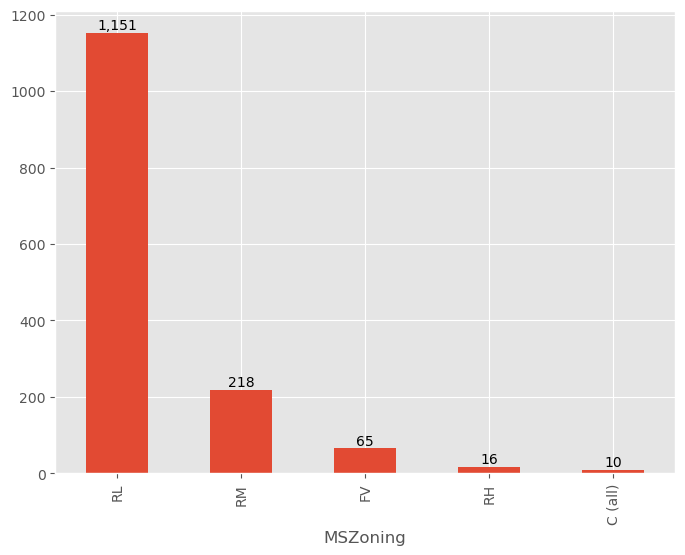

In [6]:
value_counts = train_df['MSZoning'].value_counts()
ax = value_counts.plot.bar(stacked=True, figsize=(8, 6))
for i, v in enumerate(value_counts):
    ax.text(i, v + 10, f'{v:,}', ha='center', fontsize=10)

In [7]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,

## Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

categories = all_df.columns[all_df.dtypes == 'object']
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [9]:
for cat in categories:
    le = LabelEncoder()
    print(cat)

    all_df[cat].fillna('missing', inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype('category')

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [10]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,1,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,2,3,3,0,4,0,10,2,2,3,5,4,7,1970,1970,1,1,5,5,3,0.0,3,4,1,3,3,3,5,0.0,5,0.0,546.0,546.0,1,2,1,4,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,5,6,NaN,3,0.0,0.0,5,5,2,0,0,0,0,0,0,3,4,4,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,2,3,3,0,4,0,10,2,2,4,5,4,5,1970,1970,1,1,5,5,3,0.0,3,4,1,3,3,3,4,252.0,5,0.0,294.0,546.0,1,4,1,4,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,5,4,1970.0,2,1.0,286.0,4,4,2,0,24,0,0,0,0,3,4,4,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,2,3,3,0,4,0,11,2,2,0,2,5,7,1960,1996,1,1,12,13,3,0.0,3,4,1,3,3,3,0,1224.0,5,0.0,0.0,1224.0,1,0,1,4,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,4,5,1960.0,2,2.0,576.0,4,4,2,474,0,0,0,0,0,3,4,4,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,2,3,3,0,4,0,11,2,2,0,6,5,5,1992,1992,1,1,6,15,3,0.0,3,4,2,2,3,0,2,337.0,5,0.0,575.0,912.0,1,4,1,4,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,5,6,NaN,3,0.0,0.0,5,5,2,80,32,0,0,0,0,3,2,2,700,7,2006,8,4,NaN


In [11]:
train_df_le = all_df[~all_df['SalePrice'].isnull()]
test_df_le = all_df[all_df['SalePrice'].isnull()]

## Model

In [12]:
import lightgbm as lgb
from sklearn.model_selection import KFold

n_splits = 3
folds = KFold(n_splits=n_splits)

In [13]:
lgbm_params = {
    'objective':'regression',
    'random_seed':1234
}

callbacks = [
    lgb.early_stopping(stopping_rounds=20),
    lgb.log_evaluation(period=10)
]

In [14]:
train_x = train_df_le.drop(['SalePrice', 'Id'], axis=1)
train_y = train_df_le['SalePrice']

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
models = []
rmses = []
oof = np.zeros(len(train_x))

for train_idx, val_idx in folds.split(train_x):
    x_train = train_x.iloc[train_idx]
    y_train = train_y.iloc[train_idx]
    x_valid = train_x.iloc[val_idx]
    y_valid = train_y.iloc[val_idx]

    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        callbacks=callbacks,
    )

    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2963
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 179726.031860
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.58367e+09
[20]	valid_0's l2: 7.52944e+08
[30]	valid_0's l2: 5.90683e+08
[40]	valid_0's l2: 5.50125e+08
[50]	valid_0's l2: 5.43763e+08
[60]	valid_0's l2: 5.40166e+08
[70]	valid_0's l2: 5.45038e+08
Early stopping, best iteration is:
[55]	valid_0's l2: 5.37132e+08
0.12800381488672494
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2984
[LightGBM] [Info] Number of dat

In [17]:
sum(rmses) / len(rmses)

0.1352849504777467

<Axes: >

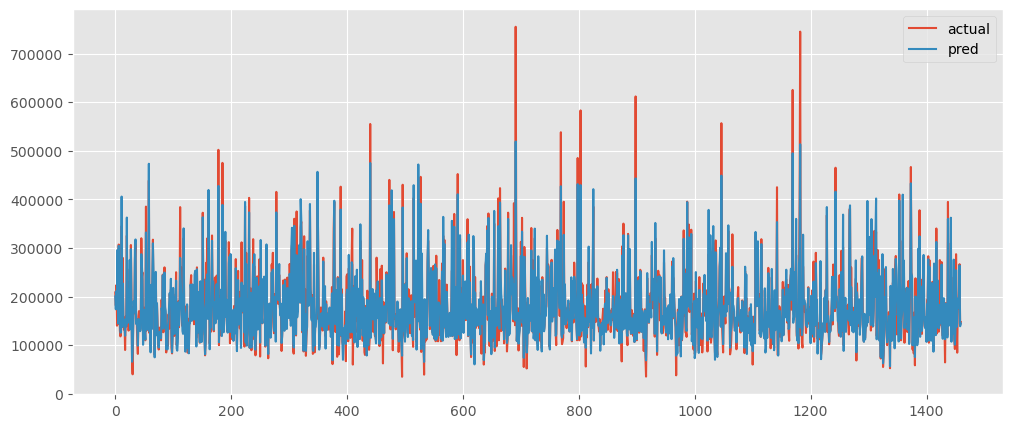

In [18]:
actual_pred_df = pd.DataFrame({
    'actual':train_y,
    'pred':oof
})

actual_pred_df.plot(figsize=(12, 5))

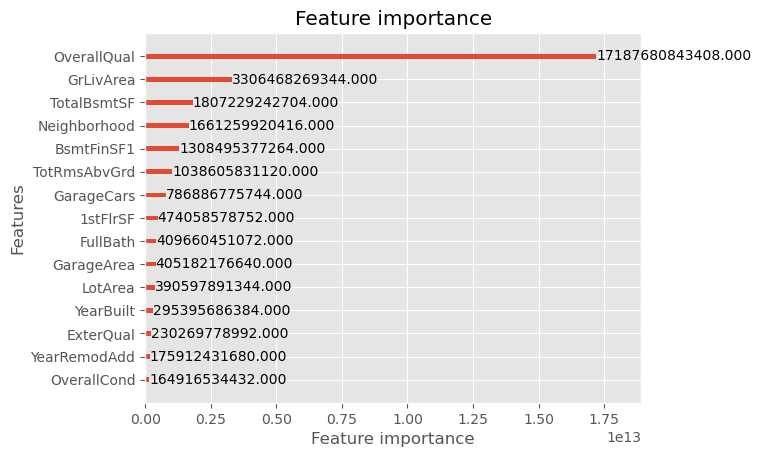

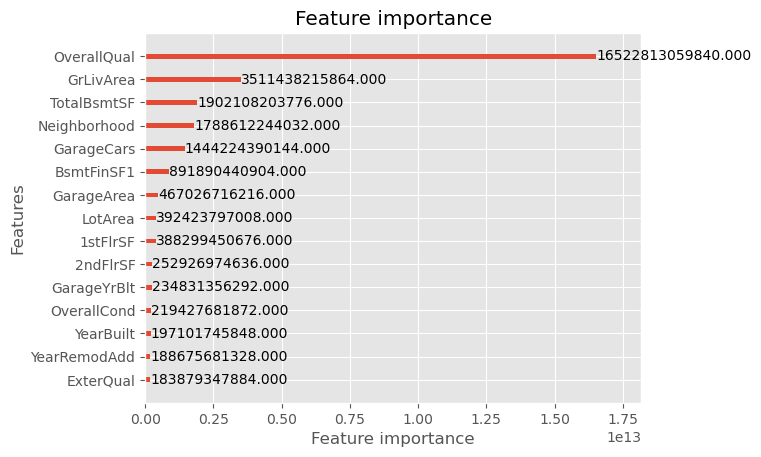

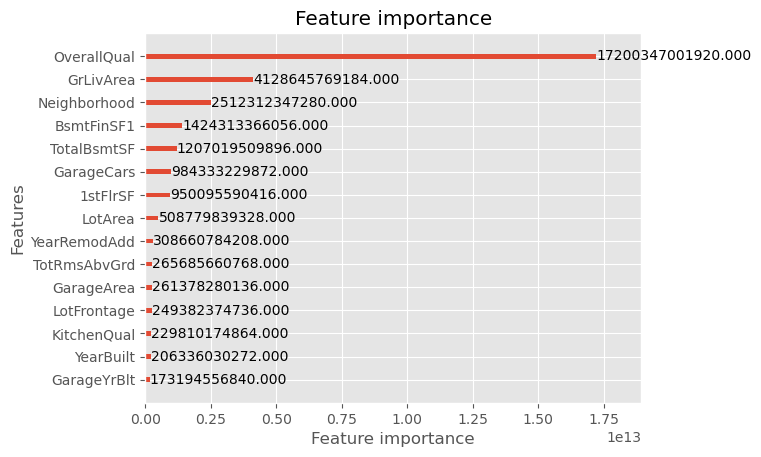

In [19]:
for model in models:
    lgb.plot_importance(model, importance_type='gain', max_num_features=15)

- focus on examining the features with high importance as indicated by the plot_importance visualization

# Engineering

In [20]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

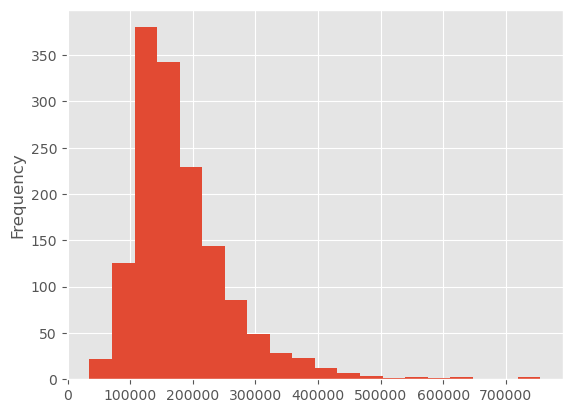

In [21]:
train_df['SalePrice'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

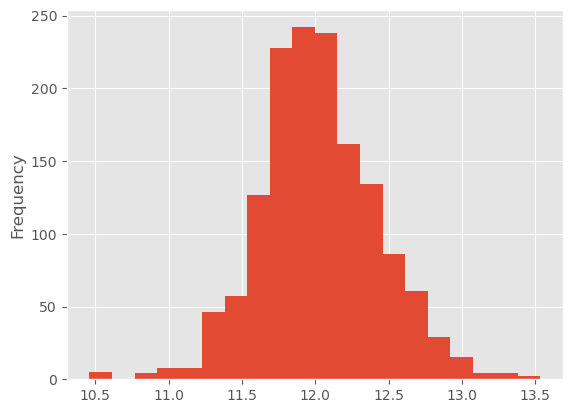

In [22]:
np.log(train_df['SalePrice']).plot.hist(bins=20)

> Analysis of the Target Variable: SalePrice

- The distribution of the target variable, **SalePrice**, appears to be left-skewed and resembles a Poisson distribution.
- After applying a logarithmic transformation, the distribution becomes approximately normal.
- The log-transformed values will be used as the target variable for modeling.


In [23]:
pd.options.mode.chained_assignment = None
train_df_le['SalePrice_log'] = np.log(train_df_le['SalePrice'])

train_x = train_df_le.drop(['SalePrice', 'SalePrice_log', 'Id'], axis=1)
train_y = train_df_le['SalePrice_log']

In [24]:
import warnings

warnings.filterwarnings('ignore')

In [25]:
models = []
rmses = []
oof = np.zeros(len(train_x))

for train_idx, val_idx in folds.split(train_x):
    x_train = train_x.iloc[train_idx]
    y_train = train_y.iloc[train_idx]
    x_valid = train_x.iloc[val_idx]
    y_valid = train_y.iloc[val_idx]

    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        callbacks=callbacks,
    )

    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2963
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 74
[LightGBM] [Info] Start training from score 12.017607
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0436707
[20]	valid_0's l2: 0.0222385
[30]	valid_0's l2: 0.0180434
[40]	valid_0's l2: 0.016907
[50]	valid_0's l2: 0.0165714
[60]	valid_0's l2: 0.0163693
[70]	valid_0's l2: 0.0162283
[80]	valid_0's l2: 0.0161985
[90]	valid_0's l2: 0.0160713
[100]	valid_0's l2: 0.0161346
Did not meet early stopping. Best iteration is:
[90]	valid_0's l2: 0.0160713
0.12677276183461014
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000881 seconds.
You can set `force_col_wise=true` to remove

In [26]:
sum(rmses) / len(rmses)

0.13179298123488875

> RMSE Improvement After Applying Log Transformation

The target variable exhibits a Poisson distribution. After applying a logarithmic transformation to the target variable during training and reverting it back for prediction, the RMSE decreased from **0.1353** to **0.1318**, demonstrating the effectiveness of the transformation.


# Missing values

In [27]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [28]:
categories = all_df.columns[all_df.dtypes == 'object']
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [29]:
all_df.isnull().sum().sort_values(ascending=False).head(40)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
                 ... 
YrSold              0
Fireplaces          0
MoSold              0
MiscVal             0
SaleCondition       0
Length: 40, dtype: int64

In [30]:
all_df['PoolQC'].value_counts(dropna=False)

PoolQC
NaN    2909
Ex        4
Gd        4
Fa        2
Name: count, dtype: int64

In [31]:
all_df.loc[~all_df['PoolQC'].isnull(), 'PoolQC'] = 1
all_df.loc[all_df['PoolQC'].isnull(), 'PoolQC'] = 0

all_df['PoolQC'].value_counts(dropna=False)

PoolQC
0    2909
1      10
Name: count, dtype: int64

In [32]:
all_df.loc[~all_df['MiscFeature'].isnull(), 'MiscFeature'] = 1
all_df.loc[all_df['MiscFeature'].isnull(), 'MiscFeature'] = 0

all_df.loc[~all_df['Alley'].isnull(), 'Alley'] = 1
all_df.loc[all_df['Alley'].isnull(), 'Alley'] = 0

In [33]:
# HighFacility_col = ['PoolQC', 'MiscFeature', 'Alley']
# for col in HighFacility_col:
#     if all_df[col].dtype == 'object':
#         if len(all_df[all_df[col].isnull()]) > 0:
#             all_df.loc[~all_df[col].isnull(), col] = 1
#             all_df.loc[all_df[col].isnull(), col] = 0

In [34]:
all_df['hasHighFacility'] = all_df['PoolQC'] + all_df['MiscFeature'] + all_df['Alley']
all_df['hasHighFacility'] = all_df['hasHighFacility'].astype(int)

In [35]:
all_df['hasHighFacility'].value_counts()

hasHighFacility
0    2615
1     295
2       9
Name: count, dtype: int64

In [36]:
all_df = all_df.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1)

# Outliers

In [37]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
...,...,...,...,...,...,...,...,...
MiscVal,2919.0,50.825968,567.402211,0.0,0.0,0.0,0.0,17000.0
MoSold,2919.0,6.213087,2.714762,1.0,4.0,6.0,8.0,12.0
YrSold,2919.0,2007.792737,1.314964,2006.0,2007.0,2008.0,2009.0,2010.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


In [38]:
train_df_num = train_df.select_dtypes(include=[np.number])
nonratio_features = ['Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'YrSold']
num_features = sorted(list(set(train_df_num) - set(nonratio_features)))
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [39]:
train_df_num_rs = train_df_num[num_features]

### Checking Variables with a Majority of Zero Values

In [40]:
for col in num_features:
    if train_df_num_rs.describe()[col]['75%'] == 0:
        print(col, len(train_df_num_rs[train_df_num_rs[col]==0]))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


### Identifying Variables with Constant Values

In [41]:
for col in num_features:
    if train_df_num_rs[col].nunique() < 15:
        print(col, train_df_num_rs[col].nunique())

BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
MoSold 12
PoolArea 8
TotRmsAbvGrd 12


### Identifying Variables with Ouliers
- Within the range of mean ± 3 standard deviations

In [42]:
for col in num_features:
    tmp_df = train_df_num_rs[(train_df_num_rs[col] > train_df_num_rs[col].mean() + train_df_num_rs[col].std() * 3) | 
    (train_df_num_rs[col] < train_df_num_rs[col].mean() - train_df_num_rs[col].std() * 3)]
    print(col, len(tmp_df))

1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
MoSold 0
OpenPorchSF 27
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22


<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

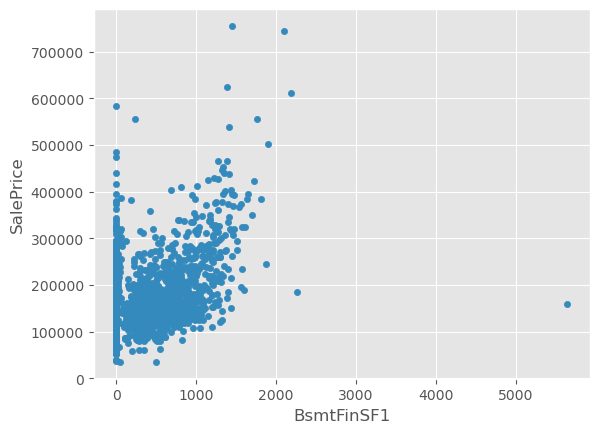

In [43]:
all_df.plot.scatter(x='BsmtFinSF1', y='SalePrice')

In [44]:
all_df[all_df['BsmtFinSF1'] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,NaN,0,1,2008,New,Partial,160000.0,1


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

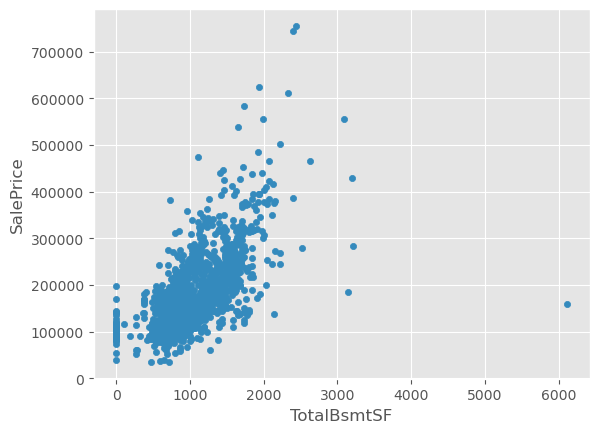

In [45]:
all_df.plot.scatter(x='TotalBsmtSF', y='SalePrice')

In [46]:
all_df[all_df['TotalBsmtSF'] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,NaN,0,1,2008,New,Partial,160000.0,1


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

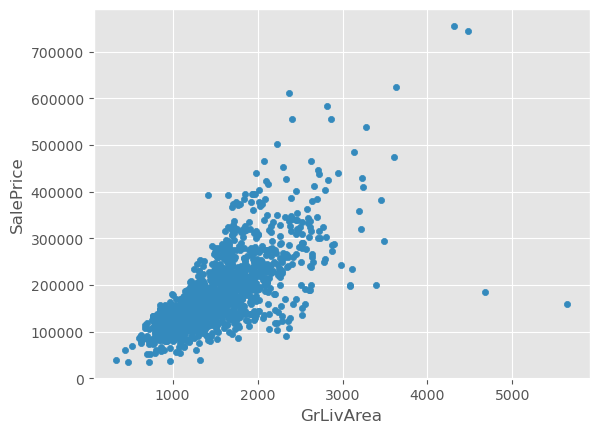

In [47]:
all_df.plot.scatter(x='GrLivArea', y='SalePrice')

In [48]:
all_df[all_df['GrLivArea'] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,17000,10,2007,New,Partial,NaN,0


<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

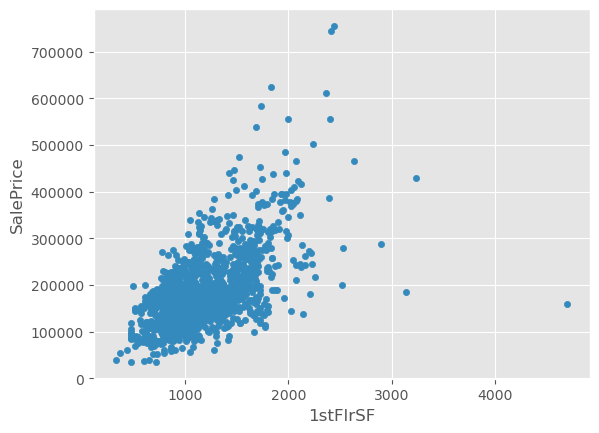

In [49]:
all_df.plot.scatter(x='1stFlrSF', y='SalePrice')

In [50]:
all_df[all_df['1stFlrSF'] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,17000,10,2007,New,Partial,NaN,0


In [51]:
all_df = all_df[(all_df['BsmtFinSF1'] < 2000) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['TotalBsmtSF'] < 3000) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['GrLivArea'] < 4500) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['1stFlrSF'] < 2500) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['LotArea'] < 100000) | (all_df['SalePrice'].isnull())]

In [52]:
categories = categories.drop(['PoolQC', 'MiscFeature', 'Alley'])

In [53]:
for cat in categories:
    le = LabelEncoder()
    print(cat)

    all_df[cat].fillna('missing', inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype('category')

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


In [54]:
train_df_le = all_df[~all_df['SalePrice'].isnull()]
test_df_le = all_df[all_df['SalePrice'].isnull()]

train_df_le['SalePrice_log'] = np.log(train_df_le['SalePrice'])
train_x = train_df_le.drop(['SalePrice', 'SalePrice_log'], axis=1)
train_y = train_df_le['SalePrice_log']

In [55]:
models = []
rmses = []
oof = np.zeros(len(train_x))

for train_idx, val_idx in folds.split(train_x):
    x_train = train_x.iloc[train_idx]
    y_train = train_y.iloc[train_idx]
    x_valid = train_x.iloc[val_idx]
    y_valid = train_y.iloc[val_idx]

    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        callbacks=callbacks,
    )

    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3203
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 73
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0423793
[20]	valid_0's l2: 0.0215221
[30]	valid_0's l2: 0.0173283
[40]	valid_0's l2: 0.0163493
[50]	valid_0's l2: 0.0161889
[60]	valid_0's l2: 0.0161643
[70]	valid_0's l2: 0.0161531
Early stopping, best iteration is:
[58]	valid_0's l2: 0.0161058
0.12690846518845703
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3197
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 73
[LightGBM] [Info] Start 

In [56]:
sum(rmses) / len(rmses)

0.12996688078919388

### RMSE Improvement After Outlier Handling

Following the identification and handling of outliers, the RMSE further decreased from **0.1318** to **0.1300**. This highlights the importance of addressing outliers in improving model performance.

# Add Feature

### Related to 'Time' Features

In [57]:
all_df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2904.000000,2904.000000,2745.000000,2904.000000
mean,1971.234504,1984.217975,1978.061202,2007.792011
std,30.319059,20.907346,25.600996,1.316366
min,1872.000000,1950.000000,1895.000000,2006.000000
25%,1953.000000,1965.000000,1960.000000,2007.000000
50%,1973.000000,1993.000000,1979.000000,2008.000000
75%,2001.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


In [60]:
all_df['Age'] = all_df['YrSold'] - all_df['YearBuilt']

In [61]:
train_df_le = all_df[~all_df['SalePrice'].isnull()]
test_df_le = all_df[all_df['SalePrice'].isnull()]

train_df_le['SalePrice_log'] = np.log(train_df_le['SalePrice'])
train_x = train_df_le.drop(['SalePrice', 'SalePrice_log'], axis=1)
train_y = train_df_le['SalePrice_log']

models = []
rmses = []
oof = np.zeros(len(train_x))

for train_idx, val_idx in folds.split(train_x):
    x_train = train_x.iloc[train_idx]
    y_train = train_y.iloc[train_idx]
    x_valid = train_x.iloc[val_idx]
    y_valid = train_y.iloc[val_idx]

    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        callbacks=callbacks,
    )

    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3300
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 74
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0424128
[20]	valid_0's l2: 0.0218082
[30]	valid_0's l2: 0.0175336
[40]	valid_0's l2: 0.0166401
[50]	valid_0's l2: 0.0163882
[60]	valid_0's l2: 0.016347
[70]	valid_0's l2: 0.0164153
Early stopping, best iteration is:
[53]	valid_0's l2: 0.0163023
0.12768037060992507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3291
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 74
[LightGBM] [Info] Start t

[60]	valid_0's l2: 0.0192979
[70]	valid_0's l2: 0.0192623
Early stopping, best iteration is:
[58]	valid_0's l2: 0.019222
0.13864328018873703
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3338
[LightGBM] [Info] Number of data points in the train set: 964, number of used features: 75
[LightGBM] [Info] Start training from score 12.021869
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0366855
[20]	valid_0's l2: 0.0187885
[30]	valid_0's l2: 0.0161232
[40]	valid_0's l2: 0.0154147
[50]	valid_0's l2: 0.0152386
[60]	valid_0's l2: 0.0153785
[70]	valid_0's l2: 0.0153885
Early stopping, best iteration is:
[53]	valid_0's l2: 0.0151608
0.12312928041104391


In [62]:
sum(rmses) / len(rmses)

0.12981764373656868

### Related to 'Area' Features

In [63]:
all_df[['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'LotFrontage']].describe()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,LotFrontage
count,2904.000000,2882.000000,2903.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2425.000000
mean,9912.604683,101.191187,559.850499,1043.794006,1152.707300,336.355372,4.718664,1493.781336,471.632794,93.265840,47.226584,22.988636,2.615702,16.086777,1.907025,69.071340
std,5178.128224,177.804595,438.438879,420.008348,377.291394,427.355787,46.515308,491.149725,214.551791,125.855568,67.195477,64.055325,25.252464,56.245764,33.082892,22.662001
min,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,7448.250000,0.000000,220.000000,791.500000,875.750000,0.000000,0.000000,1124.000000,319.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000
50%,9422.000000,0.000000,467.000000,988.000000,1080.000000,0.000000,0.000000,1441.000000,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,68.000000
75%,11503.000000,164.000000,802.500000,1296.000000,1381.250000,704.000000,0.000000,1739.250000,576.000000,168.000000,69.250000,0.000000,0.000000,0.000000,0.000000,80.000000
max,70761.000000,1600.000000,2336.000000,5095.000000,5095.000000,1872.000000,1064.000000,5095.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,313.000000


In [64]:
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']
all_df['Total_Bathrooms'] = all_df['FullBath'] + all_df['HalfBath'] + all_df['BsmtFullBath'] + all_df['BsmtHalfBath']
all_df['Total_PorchSF'] = all_df['WoodDeckSF'] + all_df['OpenPorchSF'] + all_df['EnclosedPorch'] + all_df['3SsnPorch'] + all_df['ScreenPorch']

In [65]:
all_df['hasPorch'] = all_df['Total_PorchSF'].apply(lambda x: 1 if x > 0 else 0)
all_df = all_df.drop('Total_PorchSF', axis=1)

In [68]:
train_df_le = all_df[~all_df['SalePrice'].isnull()]
test_df_le = all_df[all_df['SalePrice'].isnull()]

train_df_le['SalePrice_log'] = np.log(train_df_le['SalePrice'])
train_x = train_df_le.drop(['SalePrice', 'SalePrice_log'], axis=1)
train_y = train_df_le['SalePrice_log']

models = []
rmses = []
oof = np.zeros(len(train_x))

for train_idx, val_idx in folds.split(train_x):
    x_train = train_x.iloc[train_idx]
    y_train = train_y.iloc[train_idx]
    x_valid = train_x.iloc[val_idx]
    y_valid = train_y.iloc[val_idx]

    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        callbacks=callbacks,
    )

    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3564
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 77
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0386186
[20]	valid_0's l2: 0.0199077
[30]	valid_0's l2: 0.0162306
[40]	valid_0's l2: 0.015717
[50]	valid_0's l2: 0.0156504
[60]	valid_0's l2: 0.0156564
Early stopping, best iteration is:
[46]	valid_0's l2: 0.0156078
0.12493138248738697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3554
[LightGBM] [Info] Number of data points in the train set: 963, number of used fea

In [69]:
sum(rmses) / len(rmses)

0.1280621351252982

# Hyperparameter Tunning

In [71]:
import optuna
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

In [73]:
def objective(trial):
    params = {
        'objective': 'regression',
        'random_seed': 1234,
        'learning_rate': 0.05,
        'n_estimators': 1000,
        'num_leaves': trial.suggest_int('num_leaves', 4, 64),
        'max_bin': trial.suggest_int('max_bin', 50, 200),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 2, 16),
        'min_sum_hessian_in_leaf': trial.suggest_int('min_sum_hessian_in_leaf', 1, 10),
    }

    callbacks = [
        lgb.early_stopping(stopping_rounds=20),
        lgb.log_evaluation(period=10)
    ]

    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        callbacks=callbacks,
    )

    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

In [74]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

[I 2024-12-20 06:16:52,614] A new study created in memory with name: no-name-5f345ecf-5f82-4a4c-a823-1f08368ce979


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2962
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0652292
[20]	valid_0's l2: 0.0353922
[30]	valid_0's l2: 0.0233743
[40]	valid_0's l2: 0.0186285
[50]	valid_0's l2: 0.0162591
[60]	valid_0's l2: 0.015361
[70]	valid_0's l2: 0.014733
[80]	valid_0's l2: 0.0145481
[90]	valid_0's l2: 0.014516
[100]	valid_0's l2: 0.014326
[110]	valid_0's l2: 0.014284
[120]	valid_0's l2: 0.014261


[I 2024-12-20 06:16:52,877] Trial 0 finished with value: 0.11921704597632674 and parameters: {'num_leaves': 37, 'max_bin': 157, 'bagging_fraction': 0.7013816880358219, 'bagging_freq': 6, 'feature_fraction': 0.6118273996694523, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 5}. Best is trial 0 with value: 0.11921704597632674.


[130]	valid_0's l2: 0.0142642
[140]	valid_0's l2: 0.0143543
Early stopping, best iteration is:
[124]	valid_0's l2: 0.0142127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3292
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-12-20 06:16:53,144] Trial 1 finished with value: 0.12146655010844523 and parameters: {'num_leaves': 58, 'max_bin': 195, 'bagging_fraction': 0.5917207594128888, 'bagging_freq': 8, 'feature_fraction': 0.6644474598764523, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.11921704597632674.


[100]	valid_0's l2: 0.0149947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.0150691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

[I 2024-12-20 06:16:53,288] Trial 2 finished with value: 0.1230104964861281 and parameters: {'num_leaves': 8, 'max_bin': 63, 'bagging_fraction': 0.4101091987201629, 'bagging_freq': 9, 'feature_fraction': 0.7890783754749253, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.11921704597632674.


[110]	valid_0's l2: 0.0151798
[120]	valid_0's l2: 0.0151951
[130]	valid_0's l2: 0.0154293
Early stopping, best iteration is:
[115]	valid_0's l2: 0.0151316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2473
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0660153
[20]	valid_0's l2: 0.0357068
[30]	valid_0's l2: 0.0238764
[40]	valid_0's l2: 0.0186016
[50]	valid_0's l2: 0.0167196
[60]	valid_0's l2: 0.0156905
[70]	valid_0's l2: 0.0153141
[80]	valid_0's l2: 0.0150243
[90]	valid_0's l2: 0.0148494
[100]	valid_0's l2: 0.0146691
[110]	valid_0's l2: 0.0145815
[120]	valid_0's l2: 0.0144987
[130]	valid_0's l2: 0.0144747
[140]	valid_0's l2: 0.0143806
[150]	valid_0's l2: 0.0143573
[

[I 2024-12-20 06:16:53,705] Trial 3 finished with value: 0.11930329671565527 and parameters: {'num_leaves': 52, 'max_bin': 119, 'bagging_fraction': 0.7902645881432278, 'bagging_freq': 2, 'feature_fraction': 0.7199605106637619, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.11921704597632674.


Early stopping, best iteration is:
[188]	valid_0's l2: 0.0142333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2388
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0666291
[20]	valid_0's l2: 0.037132
[30]	valid_0's l2: 0.0254586
[40]	valid_0's l2: 0.020576
[50]	valid_0's l2: 0.0176193
[60]	valid_0's l2: 0.0161849
[70]	valid_0's l2: 0.0155996
[80]	valid_0's l2: 0.0152698
[90]	valid_0's l2: 0.0152116
[100]	valid_0's l2: 0.0149311
[110]	valid_0's l2: 0.014985
[120]	valid_0's l2: 0.0148403
[130]	valid_0's l2: 0.0148043
[140]	valid_0's l2: 0.0147305


[I 2024-12-20 06:16:53,979] Trial 4 finished with value: 0.11865683581131632 and parameters: {'num_leaves': 35, 'max_bin': 112, 'bagging_fraction': 0.5322778060523135, 'bagging_freq': 8, 'feature_fraction': 0.6280751661082743, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 1}. Best is trial 4 with value: 0.11865683581131632.


[150]	valid_0's l2: 0.0144295
[160]	valid_0's l2: 0.0141658
[170]	valid_0's l2: 0.0141123
[180]	valid_0's l2: 0.0141431
[190]	valid_0's l2: 0.0141296
[200]	valid_0's l2: 0.014139
[210]	valid_0's l2: 0.0141832
Early stopping, best iteration is:
[195]	valid_0's l2: 0.0140794
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2768
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0645878
[20]	valid_0's l2: 0.0357867
[30]	valid_0's l2: 0.0239982
[40]	valid_0's l2: 0.0191302
[50]	valid_0's l2: 0.0172389
[60]	valid_0's l2: 0.0162376
[70]	valid_0's l2: 0.015784
[80]	valid_0's l2: 0.0155575


[I 2024-12-20 06:16:54,175] Trial 5 finished with value: 0.12364773575438838 and parameters: {'num_leaves': 41, 'max_bin': 142, 'bagging_fraction': 0.7084669984373785, 'bagging_freq': 10, 'feature_fraction': 0.7409101495517417, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 5}. Best is trial 4 with value: 0.11865683581131632.


[90]	valid_0's l2: 0.0154148
[100]	valid_0's l2: 0.0153711
[110]	valid_0's l2: 0.0154059
[120]	valid_0's l2: 0.0152888
[130]	valid_0's l2: 0.0153261
[140]	valid_0's l2: 0.0153497
Early stopping, best iteration is:
[120]	valid_0's l2: 0.0152888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0669438
[20]	valid_0's l2: 0.0357543
[30]	valid_0's l2: 0.0235185
[40]	valid_0's l2: 0.0185111
[50]	valid_0's l2: 0.0165934
[60]	valid_0's l2: 0.0158753
[70]	valid_0's l2: 0.0155805
[80]	valid_0's l2: 0.0154431
[90]	valid_0's l2: 0.0151515
[100]	valid_0's l2: 0.015041

[I 2024-12-20 06:16:54,731] Trial 6 finished with value: 0.12082860699662255 and parameters: {'num_leaves': 46, 'max_bin': 59, 'bagging_fraction': 0.7333833577228339, 'bagging_freq': 7, 'feature_fraction': 0.5051912805369205, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 4}. Best is trial 4 with value: 0.11865683581131632.


[120]	valid_0's l2: 0.0149062
[130]	valid_0's l2: 0.0147988
[140]	valid_0's l2: 0.0147025
[150]	valid_0's l2: 0.0146267
[160]	valid_0's l2: 0.0146466
[170]	valid_0's l2: 0.0146186
Early stopping, best iteration is:
[153]	valid_0's l2: 0.0145996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0665913
[20]	valid_0's l2: 0.0371294
[30]	valid_0's l2: 0.0247927
[40]	valid_0's l2: 0.0194971
[50]	valid_0's l2: 0.0165494
[60]	valid_0's l2: 0.0149745
[70]	valid_0's l2: 0.0144766
[80]	valid_0's l2: 0.0142146
[90]	valid_0's l2: 0.0140171
[100]	valid_0's l2: 0.01404

[I 2024-12-20 06:16:55,187] Trial 7 finished with value: 0.11816133702556564 and parameters: {'num_leaves': 26, 'max_bin': 136, 'bagging_fraction': 0.6193007567311601, 'bagging_freq': 10, 'feature_fraction': 0.45102240537401406, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 2}. Best is trial 7 with value: 0.11816133702556564.


Early stopping, best iteration is:
[96]	valid_0's l2: 0.0139621
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0675421
[20]	valid_0's l2: 0.0361777
[30]	valid_0's l2: 0.0238224
[40]	valid_0's l2: 0.0187259
[50]	valid_0's l2: 0.0166164
[60]	valid_0's l2: 0.0155938
[70]	valid_0's l2: 0.0149512
[80]	valid_0's l2: 0.0145846
[90]	valid_0's l2: 0.0144153
[100]	valid_0's l2: 0.0141702
[110]	valid_0's l2: 0.0141983
[120]	valid_0's l2: 0.0141038
[130]	valid_0's l2: 0.0141343
[140]	valid_0's l2: 0.0139442
[150]	valid_0's l2: 0.0138941
[160]	valid_0's l2: 0.013832

[I 2024-12-20 06:16:56,031] Trial 8 finished with value: 0.11674191239223994 and parameters: {'num_leaves': 43, 'max_bin': 88, 'bagging_fraction': 0.6331553864281532, 'bagging_freq': 3, 'feature_fraction': 0.4794847918227599, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 8 with value: 0.11674191239223994.


[200]	valid_0's l2: 0.0137322
[210]	valid_0's l2: 0.0136537
[220]	valid_0's l2: 0.0136619
[230]	valid_0's l2: 0.0136898
Early stopping, best iteration is:
[219]	valid_0's l2: 0.0136287


[I 2024-12-20 06:16:56,226] Trial 9 finished with value: 0.1212520831507133 and parameters: {'num_leaves': 12, 'max_bin': 79, 'bagging_fraction': 0.5843625853304821, 'bagging_freq': 9, 'feature_fraction': 0.44855063789653066, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 1}. Best is trial 8 with value: 0.11674191239223994.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0711603
[20]	valid_0's l2: 0.0421971
[30]	valid_0's l2: 0.0286315
[40]	valid_0's l2: 0.0225614
[50]	valid_0's l2: 0.019026
[60]	valid_0's l2: 0.0169553
[70]	valid_0's l2: 0.0160462
[80]	valid_0's l2: 0.0155684
[90]	valid_0's l2: 0.0151732
[100]	valid_0's l2: 0.0148987
[110]	valid_0's l2: 0.0147254
[120]	valid_0's l2: 0.0148034
Early stopping, best iteration is:
[108]	valid_0's l2: 0.0147021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002154 seconds.
You can set `f

[I 2024-12-20 06:16:56,952] Trial 10 finished with value: 0.1266255020342232 and parameters: {'num_leaves': 63, 'max_bin': 120, 'bagging_fraction': 0.8883805440951686, 'bagging_freq': 7, 'feature_fraction': 0.7696317896991509, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 3}. Best is trial 8 with value: 0.11674191239223994.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2145
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0722109
[20]	valid_0's l2: 0.042365
[30]	valid_0's l2: 0.0282128
[40]	valid_0's l2: 0.0223193
[50]	valid_0's l2: 0.0188655
[60]	valid_0's l2: 0.0173418
[70]	valid_0's l2: 0.0166051
[80]	valid_0's l2: 0.0157297
[90]	valid_0's l2: 0.015616
[100]	valid_0's l2: 0.0153282
[110]	valid_0's l2: 0.0150498
[120]	valid_0's l2: 0.0149972


[I 2024-12-20 06:16:57,265] Trial 11 finished with value: 0.12118178679604771 and parameters: {'num_leaves': 11, 'max_bin': 94, 'bagging_fraction': 0.45936385947712205, 'bagging_freq': 4, 'feature_fraction': 0.607131497257335, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 7}. Best is trial 8 with value: 0.11674191239223994.


[130]	valid_0's l2: 0.0150491
[140]	valid_0's l2: 0.0147654
[150]	valid_0's l2: 0.0147308
[160]	valid_0's l2: 0.0147746
Early stopping, best iteration is:
[148]	valid_0's l2: 0.014685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2077
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0660268
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's l2: 0.036386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's l2: 0.0246823
[40]	valid_0's l2: 0.0196709
[LightGBM

[I 2024-12-20 06:16:57,779] Trial 12 finished with value: 0.11854880751908045 and parameters: {'num_leaves': 38, 'max_bin': 90, 'bagging_fraction': 0.6616240267333499, 'bagging_freq': 1, 'feature_fraction': 0.6879732477780897, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 8 with value: 0.11674191239223994.


[80]	valid_0's l2: 0.0145969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's l2: 0.0145052
[100]	valid_0's l2: 0.0144717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's l2: 0.0143063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	valid_0's l2: 0.0141839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[130]	valid_0's l2: 0.014152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[140]	valid_0's l2: 0.0140956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	valid_0's l2: 0.0140997
[LightGBM] [W

[I 2024-12-20 06:16:58,431] Trial 13 finished with value: 0.11942379257731198 and parameters: {'num_leaves': 44, 'max_bin': 69, 'bagging_fraction': 0.7581636020592828, 'bagging_freq': 3, 'feature_fraction': 0.49159568100355844, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 1}. Best is trial 8 with value: 0.11674191239223994.


[90]	valid_0's l2: 0.0143956
[100]	valid_0's l2: 0.0142903
[110]	valid_0's l2: 0.0142927
[120]	valid_0's l2: 0.0143305
Early stopping, best iteration is:
[104]	valid_0's l2: 0.014262
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1394
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2024-12-20 06:16:59,046] Trial 14 finished with value: 0.11969026499684979 and parameters: {'num_leaves': 54, 'max_bin': 50, 'bagging_fraction': 0.7389082683981151, 'bagging_freq': 3, 'feature_fraction': 0.7675970110612975, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 3}. Best is trial 8 with value: 0.11674191239223994.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l2: 0.0148036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2024-12-20 06:16:59,695] Trial 15 finished with value: 0.12382889911484532 and parameters: {'num_leaves': 39, 'max_bin': 139, 'bagging_fraction': 0.6861259528954367, 'bagging_freq': 3, 'feature_fraction': 0.8763745057584925, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 9}. Best is trial 8 with value: 0.11674191239223994.


[120]	valid_0's l2: 0.0154502
[130]	valid_0's l2: 0.0154292
Early stopping, best iteration is:
[110]	valid_0's l2: 0.0153336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2141
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0650793
[20]	valid_0's l2: 0.0354893
[30]	valid_0's l2: 0.0239513
[40]	valid_0's l2: 0.0191602
[50]	valid_0's l2: 0.0172534
[60]	valid_0's l2: 0.0163905
[70]	valid_0's l2: 0.0160377
[80]	valid_0's l2: 0.0158699
[90]	valid_0's l2: 0.0157346
[100]	valid_0's l2: 0.01576
[110]	valid_0's l2: 0.0157092
[120]	valid_0's l2: 0.0156655
[130]	valid_0's l2: 0.0156529
[140]	valid_0's l2: 0.0156547

[I 2024-12-20 06:17:00,805] Trial 16 finished with value: 0.12475104166384056 and parameters: {'num_leaves': 46, 'max_bin': 94, 'bagging_fraction': 0.8068989098512387, 'bagging_freq': 4, 'feature_fraction': 0.8405515985555808, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 8 with value: 0.11674191239223994.


Early stopping, best iteration is:
[163]	valid_0's l2: 0.0155628
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2986
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0644436
[20]	valid_0's l2: 0.0356482
[30]	valid_0's l2: 0.0242409
[40]	valid_0's l2: 0.0197062
[50]	valid_0's l2: 0.0174607
[60]	valid_0's l2: 0.016464
[70]	valid_0's l2: 0.0159877
[80]	valid_0's l2: 0.0157255


[I 2024-12-20 06:17:01,462] Trial 17 finished with value: 0.12321100681129211 and parameters: {'num_leaves': 46, 'max_bin': 159, 'bagging_fraction': 0.6506621909633512, 'bagging_freq': 10, 'feature_fraction': 0.7219950996148188, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 7}. Best is trial 8 with value: 0.11674191239223994.


[90]	valid_0's l2: 0.0154317
[100]	valid_0's l2: 0.0154006
[110]	valid_0's l2: 0.0155051
[120]	valid_0's l2: 0.0152441
[130]	valid_0's l2: 0.0151829
[140]	valid_0's l2: 0.0152502
Early stopping, best iteration is:
[126]	valid_0's l2: 0.015181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2155
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


[I 2024-12-20 06:17:01,660] Trial 18 finished with value: 0.12076842106213068 and parameters: {'num_leaves': 5, 'max_bin': 95, 'bagging_fraction': 0.7300867687463426, 'bagging_freq': 3, 'feature_fraction': 0.7090077144994208, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 2}. Best is trial 8 with value: 0.11674191239223994.


[10]	valid_0's l2: 0.077128
[20]	valid_0's l2: 0.0485911
[30]	valid_0's l2: 0.0345391
[40]	valid_0's l2: 0.0272405
[50]	valid_0's l2: 0.0233778
[60]	valid_0's l2: 0.0213335
[70]	valid_0's l2: 0.020323
[80]	valid_0's l2: 0.0191113
[90]	valid_0's l2: 0.0181508
[100]	valid_0's l2: 0.0173739
[110]	valid_0's l2: 0.0169183
[120]	valid_0's l2: 0.0163828
[130]	valid_0's l2: 0.0161072
[140]	valid_0's l2: 0.0158735
[150]	valid_0's l2: 0.0157804
[160]	valid_0's l2: 0.0156796
[170]	valid_0's l2: 0.0155045
[180]	valid_0's l2: 0.0154883
[190]	valid_0's l2: 0.0153528
[200]	valid_0's l2: 0.0152171
[210]	valid_0's l2: 0.0151377
[220]	valid_0's l2: 0.0150619
[230]	valid_0's l2: 0.0149128
[240]	valid_0's l2: 0.0148032
[250]	valid_0's l2: 0.0147773
[260]	valid_0's l2: 0.0146281
[270]	valid_0's l2: 0.0146496
[280]	valid_0's l2: 0.0145952
[290]	valid_0's l2: 0.0146041
Early stopping, best iteration is:
[279]	valid_0's l2: 0.014585
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of tes

[I 2024-12-20 06:17:02,028] Trial 19 finished with value: 0.12183218163740224 and parameters: {'num_leaves': 22, 'max_bin': 136, 'bagging_fraction': 0.6954363806240866, 'bagging_freq': 6, 'feature_fraction': 0.7266004099285668, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 5}. Best is trial 8 with value: 0.11674191239223994.


[120]	valid_0's l2: 0.014902
[130]	valid_0's l2: 0.0149125
[140]	valid_0's l2: 0.0149246
Early stopping, best iteration is:
[127]	valid_0's l2: 0.0148431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2287
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-12-20 06:17:02,304] Trial 20 finished with value: 0.12609874282895972 and parameters: {'num_leaves': 58, 'max_bin': 105, 'bagging_fraction': 0.6179324626328134, 'bagging_freq': 9, 'feature_fraction': 0.8030969945230428, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 2}. Best is trial 8 with value: 0.11674191239223994.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's l2: 0.0363219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2024-12-20 06:17:03,296] Trial 21 finished with value: 0.12742412054660673 and parameters: {'num_leaves': 60, 'max_bin': 157, 'bagging_fraction': 0.8994235032839333, 'bagging_freq': 2, 'feature_fraction': 0.8340630286841071, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 7}. Best is trial 8 with value: 0.11674191239223994.


Early stopping, best iteration is:
[179]	valid_0's l2: 0.0162369
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3195
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0731943
[20]	valid_0's l2: 0.0422252
[30]	valid_0's l2: 0.0286413
[40]	valid_0's l2: 0.022217
[50]	valid_0's l2: 0.0193357
[60]	valid_0's l2: 0.0179712
[70]	valid_0's l2: 0.0171432
[80]	valid_0's l2: 0.0165139
[90]	valid_0's l2: 0.0160359
[100]	valid_0's l2: 0.0157006
[110]	valid_0's l2: 0.0154182
[120]	valid_0's l2: 0.015239
[130]	valid_0's l2: 0.015189
[140]	valid_0's l2: 0.0150903
[150]	valid_0's l2: 0.0149156
[160]	valid_0's l2: 0.0147796


[I 2024-12-20 06:17:04,035] Trial 22 finished with value: 0.11997851006709098 and parameters: {'num_leaves': 11, 'max_bin': 178, 'bagging_fraction': 0.8036594793625054, 'bagging_freq': 6, 'feature_fraction': 0.6035916486129999, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 8 with value: 0.11674191239223994.


[250]	valid_0's l2: 0.0145201
Early stopping, best iteration is:
[231]	valid_0's l2: 0.0143948
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2990
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0646085
[20]	valid_0's l2: 0.0353107
[30]	valid_0's l2: 0.0244991
[40]	valid_0's l2: 0.0198469
[50]	valid_0's l2: 0.0179859
[60]	valid_0's l2: 0.0171343
[70]	valid_0's l2: 0.0166033
[80]	valid_0's l2: 0.0164896
[90]	valid_0's l2: 0.0163637
[100]	valid_0's l2: 0.0161579
[110]	valid_0's l2: 0.0160361
[120]	valid_0's l2: 0.0160067
[130]	valid_0's l2: 0.0159507
[140]	valid_0's l2: 0.0160487
[150]	valid_0's l2: 0.0159759
Early stopping, best iteration is:
[130]	valid_0's l2: 0.0159

[I 2024-12-20 06:17:04,739] Trial 23 finished with value: 0.12629598474012982 and parameters: {'num_leaves': 31, 'max_bin': 159, 'bagging_fraction': 0.8331911629643146, 'bagging_freq': 10, 'feature_fraction': 0.8279016711963055, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 4}. Best is trial 8 with value: 0.11674191239223994.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1836
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 81
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0664176
[20]	valid_0's l2: 0.0365237
[30]	valid_0's l2: 0.0243943
[40]	valid_0's l2: 0.0193825
[50]	valid_0's l2: 0.0174507
[60]	valid_0's l2: 0.0164637
[70]	valid_0's l2: 0.0160445
[80]	valid_0's l2: 0.0157694
[90]	valid_0's l2: 0.0156504
[100]	valid_0's l2: 0.0156461
[110]	valid_0's l2: 0.0155497
[120]	valid_0's l2: 0.015453
[130]	valid_0's l2: 0.0154088
[140]	valid_0's l2: 0.0153083


[I 2024-12-20 06:17:05,398] Trial 24 finished with value: 0.1232179850768788 and parameters: {'num_leaves': 48, 'max_bin': 75, 'bagging_fraction': 0.6605183031020647, 'bagging_freq': 1, 'feature_fraction': 0.49999826244820006, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 8}. Best is trial 8 with value: 0.11674191239223994.


[150]	valid_0's l2: 0.0153454
[160]	valid_0's l2: 0.0151957
[170]	valid_0's l2: 0.0152129
[180]	valid_0's l2: 0.015241
Early stopping, best iteration is:
[164]	valid_0's l2: 0.0151827
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2260
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0698257
[20]	valid_0's l2: 0.0383863
[30]	valid_0's l2: 0.0256047
[40]	valid_0's l2: 0.0197208
[50]	valid_0's l2: 0.0171591
[60]	valid_0's l2: 0.0158406
[70]	valid_0's l2: 0.0150097
[80]	valid_0's l2: 0.0145655
[90]	valid_0's l2: 0.0141925
[100]	valid_0's l2: 0.0139429
[110]	valid_0's l2: 0.0138731
[120]	valid_0's l2: 0.0135837


[I 2024-12-20 06:17:05,689] Trial 25 finished with value: 0.11623997029500928 and parameters: {'num_leaves': 17, 'max_bin': 102, 'bagging_fraction': 0.8640406467327955, 'bagging_freq': 8, 'feature_fraction': 0.41591946476565395, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 7}. Best is trial 25 with value: 0.11623997029500928.


[130]	valid_0's l2: 0.0135329
[140]	valid_0's l2: 0.0135455
Early stopping, best iteration is:
[122]	valid_0's l2: 0.0135117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1996
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0659068
[20]	valid_0's l2: 0.0362592
[30]	valid_0's l2: 0.0244755
[40]	valid_0's l2: 0.0194334
[50]	valid_0's l2: 0.017319
[60]	valid_0's l2: 0.0164567
[70]	valid_0's l2: 0.0157796
[80]	valid_0's l2: 0.0155888
[90]	valid_0's l2: 0.0155349
[100]	valid_0's l2: 0.0154459
[110]	valid_0's l2: 0.0152291
[120]	valid_0's l2: 0.015193
[130]	valid_0's l2: 0.0151864
[140]	valid_0's l2: 0.0151599

[I 2024-12-20 06:17:06,203] Trial 26 finished with value: 0.12281988899430592 and parameters: {'num_leaves': 39, 'max_bin': 85, 'bagging_fraction': 0.867106998962397, 'bagging_freq': 7, 'feature_fraction': 0.6678164015124792, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 8}. Best is trial 25 with value: 0.11623997029500928.


[150]	valid_0's l2: 0.0150847
[160]	valid_0's l2: 0.0151046
[170]	valid_0's l2: 0.0151099
Early stopping, best iteration is:
[150]	valid_0's l2: 0.0150847
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2361
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0680265
[20]	valid_0's l2: 0.0381791
[30]	valid_0's l2: 0.0254925
[40]	valid_0's l2: 0.0196712
[50]	valid_0's l2: 0.0170533
[60]	valid_0's l2: 0.0156793
[70]	valid_0's l2: 0.0151165
[80]	valid_0's l2: 0.0145482


[I 2024-12-20 06:17:06,482] Trial 27 finished with value: 0.11840108062047243 and parameters: {'num_leaves': 23, 'max_bin': 110, 'bagging_fraction': 0.5049218744875611, 'bagging_freq': 2, 'feature_fraction': 0.8721861949919668, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 5}. Best is trial 25 with value: 0.11623997029500928.


[90]	valid_0's l2: 0.0143813
[100]	valid_0's l2: 0.0142598
[110]	valid_0's l2: 0.0143264
[120]	valid_0's l2: 0.0141809
[130]	valid_0's l2: 0.0141617
[140]	valid_0's l2: 0.0140188
[150]	valid_0's l2: 0.0140663
[160]	valid_0's l2: 0.0140751
Early stopping, best iteration is:
[140]	valid_0's l2: 0.0140188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2045
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0699408


[I 2024-12-20 06:17:06,664] Trial 28 finished with value: 0.12316604034625196 and parameters: {'num_leaves': 17, 'max_bin': 88, 'bagging_fraction': 0.42901458016193783, 'bagging_freq': 5, 'feature_fraction': 0.5558979409970513, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 4}. Best is trial 25 with value: 0.11623997029500928.


[20]	valid_0's l2: 0.0401979
[30]	valid_0's l2: 0.02693
[40]	valid_0's l2: 0.0213027
[50]	valid_0's l2: 0.0185328
[60]	valid_0's l2: 0.0168939
[70]	valid_0's l2: 0.0162823
[80]	valid_0's l2: 0.0159145
[90]	valid_0's l2: 0.015846
[100]	valid_0's l2: 0.0153862
[110]	valid_0's l2: 0.0152202
[120]	valid_0's l2: 0.0152089
Early stopping, best iteration is:
[108]	valid_0's l2: 0.0151699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1449
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0696938
[20]	valid_0's l2: 0.0407328
[30]	valid_0's l2: 0.0273507
[40]	valid_0's l2: 0.0209611
[50]	valid_0's l2: 0.0178885


[I 2024-12-20 06:17:06,833] Trial 29 finished with value: 0.11589233755352568 and parameters: {'num_leaves': 14, 'max_bin': 53, 'bagging_fraction': 0.4336248157316243, 'bagging_freq': 7, 'feature_fraction': 0.6268484222780226, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 29 with value: 0.11589233755352568.


[60]	valid_0's l2: 0.0158725
[70]	valid_0's l2: 0.0152423
[80]	valid_0's l2: 0.014456
[90]	valid_0's l2: 0.0143676
[100]	valid_0's l2: 0.0141692
[110]	valid_0's l2: 0.0137842
[120]	valid_0's l2: 0.0138751
[130]	valid_0's l2: 0.013621
[140]	valid_0's l2: 0.0134448
[150]	valid_0's l2: 0.0134815
Early stopping, best iteration is:
[139]	valid_0's l2: 0.013431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1945
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-20 06:17:08,564] Trial 30 finished with value: 0.11980227844421998 and parameters: {'num_leaves': 64, 'max_bin': 82, 'bagging_fraction': 0.7315391015500504, 'bagging_freq': 3, 'feature_fraction': 0.41032549973286436, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 4}. Best is trial 29 with value: 0.11589233755352568.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[160]	valid_0's l2: 0.0145455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[142]	valid_0's l2: 0.0143526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2716
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0659012
[20]	valid_0's l2: 0.037036
[30]	valid_0's l2: 0.0251066
[40]	valid_0's l2: 0.0196468
[50]	valid_0's l2: 0.017454
[60]	valid_0's l2: 0.0165845


[I 2024-12-20 06:17:09,082] Trial 31 finished with value: 0.12543343179512012 and parameters: {'num_leaves': 27, 'max_bin': 138, 'bagging_fraction': 0.8155242276180952, 'bagging_freq': 7, 'feature_fraction': 0.8363253277236977, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 8}. Best is trial 29 with value: 0.11589233755352568.


[70]	valid_0's l2: 0.0161268
[80]	valid_0's l2: 0.0160721
[90]	valid_0's l2: 0.0159276
[100]	valid_0's l2: 0.0159642
[110]	valid_0's l2: 0.0157865
[120]	valid_0's l2: 0.0158634
[130]	valid_0's l2: 0.0158848
Early stopping, best iteration is:
[112]	valid_0's l2: 0.0157335
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3274
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.068027
[20]	valid_0's l2: 0.0389422
[30]	valid_0's l2: 0.0263367
[40]	valid_0's l2: 0.0209187
[50]	valid_0's l2: 0.0180806
[60]	valid_0's l2: 0.0167212
[70]	valid_0's l2: 0.0161305
[80]	valid_0's l2: 0.0156369
[90]	valid_0's l2: 0.0153769
[

[I 2024-12-20 06:17:09,525] Trial 32 finished with value: 0.12181977038278158 and parameters: {'num_leaves': 15, 'max_bin': 193, 'bagging_fraction': 0.7437441381939076, 'bagging_freq': 3, 'feature_fraction': 0.8736852952444621, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 3}. Best is trial 29 with value: 0.11589233755352568.


[140]	valid_0's l2: 0.0149413
[150]	valid_0's l2: 0.0149536
[160]	valid_0's l2: 0.0149388
[170]	valid_0's l2: 0.0148505
[180]	valid_0's l2: 0.0149083
[190]	valid_0's l2: 0.0148858
Early stopping, best iteration is:
[173]	valid_0's l2: 0.0148401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2587
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0676728
[20]	valid_0's l2: 0.0379197
[30]	valid_0's l2: 0.0260347


[I 2024-12-20 06:17:09,764] Trial 33 finished with value: 0.1213093130080569 and parameters: {'num_leaves': 17, 'max_bin': 128, 'bagging_fraction': 0.4128313590272658, 'bagging_freq': 3, 'feature_fraction': 0.6123427343757532, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 5}. Best is trial 29 with value: 0.11589233755352568.


[40]	valid_0's l2: 0.0201737
[50]	valid_0's l2: 0.0177056
[60]	valid_0's l2: 0.0160427
[70]	valid_0's l2: 0.0156174
[80]	valid_0's l2: 0.0153453
[90]	valid_0's l2: 0.0151789
[100]	valid_0's l2: 0.0149686
[110]	valid_0's l2: 0.0148321
[120]	valid_0's l2: 0.0147855
[130]	valid_0's l2: 0.0149113
Early stopping, best iteration is:
[112]	valid_0's l2: 0.0147159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2718
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0678484
[20]	valid_0's l2: 0.0375173
[30]	valid_0's l2: 0.0250043
[40]	valid_0's l2: 0.0194036
[50]	valid_0's l2: 0.0170116
[60]	valid_0's l2: 0.0159866


[I 2024-12-20 06:17:10,255] Trial 34 finished with value: 0.11634729970801329 and parameters: {'num_leaves': 20, 'max_bin': 138, 'bagging_fraction': 0.8319278029616157, 'bagging_freq': 2, 'feature_fraction': 0.6586895535770572, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 8}. Best is trial 29 with value: 0.11589233755352568.


[160]	valid_0's l2: 0.0138054
[170]	valid_0's l2: 0.0138302
[180]	valid_0's l2: 0.0137112
[190]	valid_0's l2: 0.0136338
[200]	valid_0's l2: 0.013698
[210]	valid_0's l2: 0.0136122
[220]	valid_0's l2: 0.0135883
[230]	valid_0's l2: 0.0135903
[240]	valid_0's l2: 0.0135478
[250]	valid_0's l2: 0.0135432
[260]	valid_0's l2: 0.0135601
Early stopping, best iteration is:
[243]	valid_0's l2: 0.0135367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2677
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0676624
[20]	valid_0's l2: 0.038398
[30]	valid_0's l2: 0.0256724
[40]	valid_0's l2: 0.0198658
[50]	valid_0's l2: 0.017

[I 2024-12-20 06:17:10,765] Trial 35 finished with value: 0.12060431244657432 and parameters: {'num_leaves': 28, 'max_bin': 135, 'bagging_fraction': 0.49163991810703933, 'bagging_freq': 2, 'feature_fraction': 0.6440281403244773, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 10}. Best is trial 29 with value: 0.11589233755352568.


[140]	valid_0's l2: 0.0146921
Early stopping, best iteration is:
[126]	valid_0's l2: 0.0145454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3033
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0653865
[20]	valid_0's l2: 0.0359061
[30]	valid_0's l2: 0.0241961
[40]	valid_0's l2: 0.0193949
[50]	valid_0's l2: 0.0171419
[60]	valid_0's l2: 0.0161416
[70]	valid_0's l2: 0.0157385
[80]	valid_0's l2: 0.0155191
[90]	valid_0's l2: 0.0154423
[100]	valid_0's l2: 0.01534
[110]	valid_0's l2: 0.0152626
[120]	valid_0's l2: 0.015219
[130]	valid_0's l2: 0.0152261
[140]	valid_0's l2: 0.0151806
[150]	valid_0's l2: 0.0151599


[I 2024-12-20 06:17:11,729] Trial 36 finished with value: 0.12272934961184617 and parameters: {'num_leaves': 50, 'max_bin': 163, 'bagging_fraction': 0.8518598698729667, 'bagging_freq': 1, 'feature_fraction': 0.6760962349612033, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 29 with value: 0.11589233755352568.


[170]	valid_0's l2: 0.0150715
[180]	valid_0's l2: 0.015074
[190]	valid_0's l2: 0.0150867
Early stopping, best iteration is:
[171]	valid_0's l2: 0.0150625
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2014
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0680369
[20]	valid_0's l2: 0.0387462
[30]	valid_0's l2: 0.0261549
[40]	valid_0's l2: 0.0205203


[I 2024-12-20 06:17:12,135] Trial 37 finished with value: 0.12167837765668933 and parameters: {'num_leaves': 21, 'max_bin': 86, 'bagging_fraction': 0.45014697113274893, 'bagging_freq': 1, 'feature_fraction': 0.8647646583960953, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 8}. Best is trial 29 with value: 0.11589233755352568.


[50]	valid_0's l2: 0.0179323
[60]	valid_0's l2: 0.0164582
[70]	valid_0's l2: 0.0157412
[80]	valid_0's l2: 0.0152512
[90]	valid_0's l2: 0.0149859
[100]	valid_0's l2: 0.0148497
[110]	valid_0's l2: 0.0148278
Early stopping, best iteration is:
[97]	valid_0's l2: 0.0148056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2716
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0675743
[20]	valid_0's l2: 0.0388078
[30]	valid_0's l2: 0.0267758
[40]	valid_0's l2: 0.0210786
[50]	valid_0's l2: 0.0193062
[60]	valid_0's l2: 0.0178358
[70]	valid_0's l2: 0.0169407
[80]	valid_0's l2: 0.0164664
[90]	valid_0's l2: 0.0162658
[10

[I 2024-12-20 06:17:12,472] Trial 38 finished with value: 0.12389384222570389 and parameters: {'num_leaves': 21, 'max_bin': 138, 'bagging_fraction': 0.4319776330604906, 'bagging_freq': 5, 'feature_fraction': 0.8887475698722234, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 29 with value: 0.11589233755352568.


[170]	valid_0's l2: 0.0155622
[180]	valid_0's l2: 0.0154318
[190]	valid_0's l2: 0.0156898
Early stopping, best iteration is:
[175]	valid_0's l2: 0.0153497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1980
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0646979
[20]	valid_0's l2: 0.0357813
[30]	valid_0's l2: 0.0244423
[40]	valid_0's l2: 0.0199852
[50]	valid_0's l2: 0.0177989
[60]	valid_0's l2: 0.0168139
[70]	valid_0's l2: 0.0162655
[80]	valid_0's l2: 0.0159507
[90]	valid_0's l2: 0.0158228
[100]	valid_0's l2: 0.0157285


[I 2024-12-20 06:17:13,233] Trial 39 finished with value: 0.12457803178223305 and parameters: {'num_leaves': 62, 'max_bin': 84, 'bagging_fraction': 0.8746594112078407, 'bagging_freq': 10, 'feature_fraction': 0.7996012936761958, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 9}. Best is trial 29 with value: 0.11589233755352568.


[110]	valid_0's l2: 0.0156458
[120]	valid_0's l2: 0.0155801
[130]	valid_0's l2: 0.0155384
[140]	valid_0's l2: 0.0155884
Early stopping, best iteration is:
[129]	valid_0's l2: 0.0155197
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3195
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0689211
[20]	valid_0's l2: 0.0379706
[30]	valid_0's l2: 0.0254398
[40]	valid_0's l2: 0.0197796
[50]	valid_0's l2: 0.0173932
[60]	valid_0's l2: 0.0160999
[70]	valid_0's l2: 0.0152682
[80]	valid_0's l2: 0.0148943
[90]	valid_0's l2: 0.0144708
[100]	valid_0's l2: 0.0143208
[110]	valid_0's l2: 0.0141713
[120]	valid_0's l2: 0.01415

[I 2024-12-20 06:17:14,103] Trial 40 finished with value: 0.11786345228429834 and parameters: {'num_leaves': 21, 'max_bin': 178, 'bagging_fraction': 0.7089383459587619, 'bagging_freq': 1, 'feature_fraction': 0.5736167589661099, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 10}. Best is trial 29 with value: 0.11589233755352568.


[170]	valid_0's l2: 0.0139044
[180]	valid_0's l2: 0.0139152
[190]	valid_0's l2: 0.0139383
Early stopping, best iteration is:
[176]	valid_0's l2: 0.0138918
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0662487
[20]	valid_0's l2: 0.0361336
[30]	valid_0's l2: 0.0244434
[40]	valid_0's l2: 0.0194613
[50]	valid_0's l2: 0.0166814
[60]	valid_0's l2: 0.0153679
[70]	valid_0's l2: 0.0148875
[80]	valid_0's l2: 0.0145297


[I 2024-12-20 06:17:14,594] Trial 41 finished with value: 0.1164308079297428 and parameters: {'num_leaves': 33, 'max_bin': 125, 'bagging_fraction': 0.7197362581993618, 'bagging_freq': 4, 'feature_fraction': 0.4684501358427995, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 2}. Best is trial 29 with value: 0.11589233755352568.


[90]	valid_0's l2: 0.0143348
[100]	valid_0's l2: 0.0141549
[110]	valid_0's l2: 0.013872
[120]	valid_0's l2: 0.0137395
[130]	valid_0's l2: 0.0137933
[140]	valid_0's l2: 0.0136499
[150]	valid_0's l2: 0.0135595
[160]	valid_0's l2: 0.0136235
Early stopping, best iteration is:
[149]	valid_0's l2: 0.0135561
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1959
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2024-12-20 06:17:14,905] Trial 42 finished with value: 0.12706738118470853 and parameters: {'num_leaves': 35, 'max_bin': 83, 'bagging_fraction': 0.44892224224701704, 'bagging_freq': 9, 'feature_fraction': 0.8864597445115652, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 10}. Best is trial 29 with value: 0.11589233755352568.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[130]	valid_0's l2: 0.0163705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[112]	valid_0's l2: 0.0161461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the ove

[I 2024-12-20 06:17:15,396] Trial 43 finished with value: 0.12214824808799869 and parameters: {'num_leaves': 51, 'max_bin': 100, 'bagging_fraction': 0.4405506949939984, 'bagging_freq': 5, 'feature_fraction': 0.5161170710854714, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 1}. Best is trial 29 with value: 0.11589233755352568.


[120]	valid_0's l2: 0.0149361
[130]	valid_0's l2: 0.0149414
[140]	valid_0's l2: 0.0150655
[150]	valid_0's l2: 0.0150937
Early stopping, best iteration is:
[131]	valid_0's l2: 0.0149202
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1415
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0677918
[20]	valid_0's l2: 0.0358675
[30]	valid_0's l2: 0.0231289
[40]	valid_0's l2: 0.0179037
[50]	valid_0's l2: 0.016076
[60]	valid_0's l2: 0.0150998
[70]	valid_0's l2: 0.0145403
[80]	valid_0's l2: 0.0142537
[90]	valid_0's l2: 0.0140334
[100]	valid_0's l2: 0.0139136
[110]	valid_0's l2: 0.0137642
[120]	valid_0's l2: 0.013686

[I 2024-12-20 06:17:16,631] Trial 44 finished with value: 0.11691267267135667 and parameters: {'num_leaves': 48, 'max_bin': 51, 'bagging_fraction': 0.7852903742513881, 'bagging_freq': 2, 'feature_fraction': 0.4397610412933779, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 7}. Best is trial 29 with value: 0.11589233755352568.


Early stopping, best iteration is:
[129]	valid_0's l2: 0.0136686
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2402
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0668142
[20]	valid_0's l2: 0.0382942
[30]	valid_0's l2: 0.0266203
[40]	valid_0's l2: 0.0210635
[50]	valid_0's l2: 0.0181177
[60]	valid_0's l2: 0.0163794
[70]	valid_0's l2: 0.0157357
[80]	valid_0's l2: 0.0154215
[90]	valid_0's l2: 0.0152567
[100]	valid_0's l2: 0.0151941
[110]	valid_0's l2: 0.0148676
[120]	valid_0's l2: 0.0146455
[130]	valid_0's l2: 0.0146908
[140]	valid_0's l2: 0.0146362
[150]	valid_0's l2: 0.0146077
[160]	valid_0's l2: 0.0146067


[I 2024-12-20 06:17:17,578] Trial 45 finished with value: 0.12062882202340824 and parameters: {'num_leaves': 18, 'max_bin': 113, 'bagging_fraction': 0.6786843956619585, 'bagging_freq': 9, 'feature_fraction': 0.7635221313556642, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 2}. Best is trial 29 with value: 0.11589233755352568.


[170]	valid_0's l2: 0.0146031
Early stopping, best iteration is:
[157]	valid_0's l2: 0.0145513
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2155
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0741498
[20]	valid_0's l2: 0.0451791
[30]	valid_0's l2: 0.0319442
[40]	valid_0's l2: 0.0242911
[50]	valid_0's l2: 0.0208362
[60]	valid_0's l2: 0.0187629
[70]	valid_0's l2: 0.0173886
[80]	valid_0's l2: 0.0163799
[90]	valid_0's l2: 0.0158522
[100]	valid_0's l2: 0.0152117
[110]	valid_0's l2: 0.0149408
[120]	valid_0's l2: 0.0148993
[130]	valid_0's l2: 0.0147253
[140]	valid_0's l2: 0.0145216
[150]	valid_0's l2: 0.0144819


[I 2024-12-20 06:17:17,763] Trial 46 finished with value: 0.12025236546685791 and parameters: {'num_leaves': 7, 'max_bin': 95, 'bagging_fraction': 0.5310590746198391, 'bagging_freq': 5, 'feature_fraction': 0.7416406677738403, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 3}. Best is trial 29 with value: 0.11589233755352568.


[160]	valid_0's l2: 0.0144993
[170]	valid_0's l2: 0.0146532
Early stopping, best iteration is:
[151]	valid_0's l2: 0.0144606
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1866
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.066396
[20]	valid_0's l2: 0.0356926
[30]	valid_0's l2: 0.0236017
[40]	valid_0's l2: 0.0188424
[50]	valid_0's l2: 0.016586
[60]	valid_0's l2: 0.0155991


[I 2024-12-20 06:17:18,095] Trial 47 finished with value: 0.11930888074016557 and parameters: {'num_leaves': 27, 'max_bin': 77, 'bagging_fraction': 0.7942727561532594, 'bagging_freq': 1, 'feature_fraction': 0.7484986208624937, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 8}. Best is trial 29 with value: 0.11589233755352568.


[70]	valid_0's l2: 0.0151076
[80]	valid_0's l2: 0.0147175
[90]	valid_0's l2: 0.0145921
[100]	valid_0's l2: 0.0143693
[110]	valid_0's l2: 0.0142766
[120]	valid_0's l2: 0.0142384
[130]	valid_0's l2: 0.0143102
Early stopping, best iteration is:
[119]	valid_0's l2: 0.0142346
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2304
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 80
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds


[I 2024-12-20 06:17:18,343] Trial 48 finished with value: 0.11732066728038318 and parameters: {'num_leaves': 19, 'max_bin': 106, 'bagging_fraction': 0.6937998175981945, 'bagging_freq': 3, 'feature_fraction': 0.5854263996089444, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 5}. Best is trial 29 with value: 0.11589233755352568.


[10]	valid_0's l2: 0.0687937
[20]	valid_0's l2: 0.0385766
[30]	valid_0's l2: 0.0256995
[40]	valid_0's l2: 0.0198794
[50]	valid_0's l2: 0.0172817
[60]	valid_0's l2: 0.0160033
[70]	valid_0's l2: 0.0152281
[80]	valid_0's l2: 0.0148745
[90]	valid_0's l2: 0.014545
[100]	valid_0's l2: 0.0142068
[110]	valid_0's l2: 0.0140638
[120]	valid_0's l2: 0.0139282
[130]	valid_0's l2: 0.0137641
[140]	valid_0's l2: 0.013887
[150]	valid_0's l2: 0.0138236
Early stopping, best iteration is:
[130]	valid_0's l2: 0.0137641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3110
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 79
[LightGBM] [Info] Start training from score 12.015333
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0756239
[20]	valid_0's l2: 0.0467512
[30]	valid_0's l2: 0.0334089
[40]	v

[I 2024-12-20 06:17:18,456] Trial 49 finished with value: 0.12178641890933756 and parameters: {'num_leaves': 6, 'max_bin': 170, 'bagging_fraction': 0.4384782234933164, 'bagging_freq': 6, 'feature_fraction': 0.5534050497725981, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 10}. Best is trial 29 with value: 0.11589233755352568.


[190]	valid_0's l2: 0.0150716
[200]	valid_0's l2: 0.014994
[210]	valid_0's l2: 0.0149164
[220]	valid_0's l2: 0.0149429
[230]	valid_0's l2: 0.014878
Early stopping, best iteration is:
[216]	valid_0's l2: 0.0148319


{'num_leaves': 14,
 'max_bin': 53,
 'bagging_fraction': 0.4336248157316243,
 'bagging_freq': 7,
 'feature_fraction': 0.6268484222780226,
 'min_data_in_leaf': 10,
 'min_sum_hessian_in_leaf': 9}

In [82]:
lgbm_params = {
    'objective': 'regression',
    'random_seed': 1234,
    'learning_rate': 0.05,
    'n_estimators': 1000,
    'num_leaves': 14,
    'max_bin': 53,
    'bagging_fraction': 0.4336248157316243,
    'bagging_freq': 7,
    'feature_fraction': 0.6268484222780226,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 9
 }

train_df_le = all_df[~all_df['SalePrice'].isnull()]
test_df_le = all_df[all_df['SalePrice'].isnull()]

train_df_le['SalePrice_log'] = np.log(train_df_le['SalePrice'])
train_x = train_df_le.drop(['SalePrice', 'SalePrice_log', 'Id'], axis=1)
train_y = train_df_le['SalePrice_log']

models = []
rmses = []
oof = np.zeros(len(train_x))

for train_idx, val_idx in folds.split(train_x):
    x_train = train_x.iloc[train_idx]
    y_train = train_y.iloc[train_idx]
    x_valid = train_x.iloc[val_idx]
    y_valid = train_y.iloc[val_idx]

    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        callbacks=callbacks,
    )

    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1369
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 78
[LightGBM] [Info] Start training from score 12.010615
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0740357
[20]	valid_0's l2: 0.0405753
[30]	valid_0's l2: 0.0275812
[40]	valid_0's l2: 0.0206341
[50]	valid_0's l2: 0.0174291
[60]	valid_0's l2: 0.0157038
[70]	valid_0's l2: 0.0149737
[80]	valid_0's l2: 0.0143443
[90]	valid_0's l2: 0.0142651
[100]	valid_0's l2: 0.0141048
[110]	valid_0's l2: 0.0139193
[120]	valid_0's l2: 0.0137099
[130]	valid_0's l2: 0.0138456
[140]	valid_0's l2: 0.0139278
Early stopping, best iteration is:
[121]	valid_0's l2: 0.0136946
0.11702380107615618
[LightGBM] [Info] Auto-choosing row-wi

In [83]:
sum(rmses) / len(rmses)

0.12309138607890739

# Submission

In [84]:
train_df_le.shape, test_df_le.shape

((1445, 84), (1459, 83))

In [85]:
test_x = test_df_le.drop(['SalePrice', 'Id'], axis=1)

In [86]:
preds = []

for model in models:
    pred = model.predict(test_x)
    preds.append(pred)

In [87]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [88]:
preds_exp = np.exp(preds_mean)
len(preds_exp)

1459

In [90]:
submission['SalePrice'] = preds_exp
submission.to_csv('./data/02_baseline_submssion.csv', index=False)

In [96]:
!chmod 600 /teamspace/studios/this_studio/.kaggle/kaggle.json
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f "./data/02_baseline_submssion.csv" -m "02_baseline_submission"

100%|███████████████████████████████████████| 33.6k/33.6k [00:00<00:00, 128kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

# Ensemble

## RandomForest

In [97]:
from sklearn.ensemble import RandomForestRegressor as rf

In [100]:
hasnan_cat = []
for col in all_df.columns:
    tmp_null_count = all_df[col].isnull().sum()
    if (tmp_null_count > 0) & (col != 'SalePrice'):
        print(col, tmp_null_count)
        hasnan_cat.append(col)

LotFrontage 479
MasVnrArea 22
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1
TotalSF 1
Total_Bathrooms 2


In [101]:
all_df[hasnan_cat].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,TotalSF,Total_Bathrooms
count,2425.000000,2882.000000,2903.000000,2903.000000,2903.000000,2903.000000,2902.000000,2902.000000,2745.000000,2903.000000,2903.000000,2903.000000,2902.000000
mean,69.071340,101.191187,434.926628,49.016879,559.850499,1043.794006,0.426258,0.061337,1978.061202,1.763348,471.632794,2533.060971,2.431771
std,22.662001,177.804595,440.128728,168.444473,438.438879,420.008348,0.522410,0.245667,25.600996,0.761410,214.551791,764.699033,0.937184
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,334.000000,1.000000
25%,59.000000,0.000000,0.000000,0.000000,220.000000,791.500000,0.000000,0.000000,1960.000000,1.000000,319.500000,1998.500000,2.000000
50%,68.000000,0.000000,365.000000,0.000000,467.000000,988.000000,0.000000,0.000000,1979.000000,2.000000,478.000000,2444.000000,2.000000
75%,80.000000,164.000000,728.500000,0.000000,802.500000,1296.000000,1.000000,0.000000,2002.000000,2.000000,576.000000,2985.000000,3.000000
max,313.000000,1600.000000,4010.000000,1526.000000,2336.000000,5095.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000,10190.000000,8.000000


In [103]:
for col in all_df.columns:
    tmp_null_count = all_df[col].isnull().sum()
    if (tmp_null_count > 0) & (col != 'SalePrice'):
        print(col, tmp_null_count)
        all_df[col] = all_df[col].fillna(all_df[col].median())

LotFrontage 479
MasVnrArea 22
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1
TotalSF 1
Total_Bathrooms 2


In [105]:
train_df_le = all_df[~all_df['SalePrice'].isnull()]
test_df_le = all_df[all_df['SalePrice'].isnull()]
train_df_le['SalePrice_log'] = np.log(train_df_le['SalePrice'])

train_x = train_df_le.drop(['SalePrice', 'SalePrice_log', 'Id'], axis=1)
train_y = train_df_le['SalePrice_log']

n_splits = 3
folds = KFold(n_splits=n_splits)

models_rf = []
rmses_rf = []
oof_rf = np.zeros(len(train_x))
for train_idx, val_idx in folds.split(train_x):
    x_train = train_x.iloc[train_idx]
    x_valid = train_x.iloc[val_idx]
    y_train = train_y.iloc[train_idx]
    y_valid = train_y.iloc[val_idx]

    model_rf = rf(
        n_estimators = 50,
        random_state=1234
    )

    model_rf.fit(x_train, y_train)
    y_pred = model_rf.predict(x_valid)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    models_rf.append(model_rf)
    rmses_rf.append(tmp_rmse)
    oof_rf[val_idx] = y_pred

0.1390664826637409
0.1427995466179179
0.12911196355475804


In [106]:
sum(rmses_rf) / len(rmses_rf)

0.13699266427880563

In [107]:
test_x = test_df_le.drop(['SalePrice', 'Id'], axis=1)

In [108]:
preds_rf = []
for model in models_rf:
    pred = model.predict(test_x)
    preds_rf.append(pred)

In [110]:
preds_array_rf = np.array(preds_rf)
preds_mean_rf = np.mean(preds_array_rf, axis=0)
preds_exp_rf = np.exp(preds_mean_rf)
submission['SalePrice'] = preds_exp_rf

In [112]:
submission.to_csv('./data/02_rf_submission.csv', index=False)
!chmod 600 /teamspace/studios/this_studio/.kaggle/kaggle.json
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f "./data/02_rf_submission.csv" -m "02_rf_submission"

100%|███████████████████████████████████████| 33.7k/33.7k [00:00<00:00, 129kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

## XGBoost

In [114]:
import xgboost as xgb

`xgboost` can't read categorical features

In [115]:
categories = train_x.columns[train_x.dtypes == 'category']
for col in categories:
    train_x[col] = train_x[col].astype('int8')
    test_x[col] = test_x[col].astype('int8')

In [116]:
x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

In [119]:
def objective(trial):
    xgb_params = {
        'learning_rate': 0.05,
        'seed': 1234,
        'max_depth': trial.suggest_int('max_depth', 3, 16),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.2, 0.9),
        'sublsample': trial.suggest_uniform('sublsample', 0.2, 0.9),
    }

    xgb_train = xgb.DMatrix(x_train, label=y_train)
    xgb_eval = xgb.DMatrix(x_valid, label=y_valid)
    evals = [(xgb_train, 'train'), (xgb_eval, 'eval')]
    
    model_xgb = xgb.train(
        xgb_params,
        xgb_train,
        evals=evals,
        num_boost_round=1000,
        early_stopping_rounds=200,
        verbose_eval=10,
    )

    y_pred = model_xgb.predict(xgb_eval)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

In [120]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

[I 2024-12-20 07:17:45,669] A new study created in memory with name: no-name-6e41c993-fe93-46d6-b729-71a7c0cf592b


[0]	train-rmse:0.37912	eval-rmse:0.36305
[10]	train-rmse:0.24452	eval-rmse:0.25294
[20]	train-rmse:0.16064	eval-rmse:0.19343
[30]	train-rmse:0.10739	eval-rmse:0.16355
[40]	train-rmse:0.07317	eval-rmse:0.14878
[50]	train-rmse:0.05076	eval-rmse:0.14166
[60]	train-rmse:0.03578	eval-rmse:0.13832
[70]	train-rmse:0.02564	eval-rmse:0.13670
[80]	train-rmse:0.01879	eval-rmse:0.13571
[90]	train-rmse:0.01397	eval-rmse:0.13536
[100]	train-rmse:0.01057	eval-rmse:0.13510
[110]	train-rmse:0.00822	eval-rmse:0.13494
[120]	train-rmse:0.00652	eval-rmse:0.13480
[130]	train-rmse:0.00530	eval-rmse:0.13475
[140]	train-rmse:0.00441	eval-rmse:0.13471
[150]	train-rmse:0.00359	eval-rmse:0.13467
[160]	train-rmse:0.00302	eval-rmse:0.13464
[170]	train-rmse:0.00261	eval-rmse:0.13461
[180]	train-rmse:0.00225	eval-rmse:0.13461
[190]	train-rmse:0.00201	eval-rmse:0.13458
[200]	train-rmse:0.00179	eval-rmse:0.13456
[210]	train-rmse:0.00161	eval-rmse:0.13456
[220]	train-rmse:0.00149	eval-rmse:0.13455
[230]	train-rmse:0.001

[I 2024-12-20 07:18:03,002] Trial 0 finished with value: 0.13452546098836415 and parameters: {'max_depth': 10, 'colsample_bytree': 0.7006325564606937, 'sublsample': 0.6219343632501507}. Best is trial 0 with value: 0.13452546098836415.


[0]	train-rmse:0.37909	eval-rmse:0.36297
[10]	train-rmse:0.24529	eval-rmse:0.25182
[20]	train-rmse:0.16184	eval-rmse:0.19198
[30]	train-rmse:0.10859	eval-rmse:0.15985
[40]	train-rmse:0.07455	eval-rmse:0.14354
[50]	train-rmse:0.05170	eval-rmse:0.13542
[60]	train-rmse:0.03678	eval-rmse:0.13133
[70]	train-rmse:0.02675	eval-rmse:0.12935
[80]	train-rmse:0.01976	eval-rmse:0.12836
[90]	train-rmse:0.01478	eval-rmse:0.12780
[100]	train-rmse:0.01130	eval-rmse:0.12749
[110]	train-rmse:0.00880	eval-rmse:0.12724
[120]	train-rmse:0.00700	eval-rmse:0.12714
[130]	train-rmse:0.00574	eval-rmse:0.12703
[140]	train-rmse:0.00482	eval-rmse:0.12698
[150]	train-rmse:0.00409	eval-rmse:0.12692
[160]	train-rmse:0.00353	eval-rmse:0.12684
[170]	train-rmse:0.00308	eval-rmse:0.12682
[180]	train-rmse:0.00276	eval-rmse:0.12678
[190]	train-rmse:0.00242	eval-rmse:0.12676
[200]	train-rmse:0.00217	eval-rmse:0.12674
[210]	train-rmse:0.00199	eval-rmse:0.12672
[220]	train-rmse:0.00183	eval-rmse:0.12672
[230]	train-rmse:0.001

[I 2024-12-20 07:18:05,792] Trial 1 finished with value: 0.12669083565578734 and parameters: {'max_depth': 10, 'colsample_bytree': 0.49655835953723326, 'sublsample': 0.6521258791466593}. Best is trial 1 with value: 0.12669083565578734.


[0]	train-rmse:0.37915	eval-rmse:0.36335
[10]	train-rmse:0.24479	eval-rmse:0.25246
[20]	train-rmse:0.16125	eval-rmse:0.19339
[30]	train-rmse:0.10803	eval-rmse:0.16308
[40]	train-rmse:0.07399	eval-rmse:0.14940
[50]	train-rmse:0.05183	eval-rmse:0.14280
[60]	train-rmse:0.03698	eval-rmse:0.13922
[70]	train-rmse:0.02712	eval-rmse:0.13766
[80]	train-rmse:0.02038	eval-rmse:0.13696
[90]	train-rmse:0.01577	eval-rmse:0.13655
[100]	train-rmse:0.01260	eval-rmse:0.13645
[110]	train-rmse:0.01020	eval-rmse:0.13640
[120]	train-rmse:0.00849	eval-rmse:0.13631
[130]	train-rmse:0.00723	eval-rmse:0.13619
[140]	train-rmse:0.00628	eval-rmse:0.13611
[150]	train-rmse:0.00560	eval-rmse:0.13604
[160]	train-rmse:0.00502	eval-rmse:0.13602
[170]	train-rmse:0.00459	eval-rmse:0.13602
[180]	train-rmse:0.00420	eval-rmse:0.13600
[190]	train-rmse:0.00383	eval-rmse:0.13597
[200]	train-rmse:0.00355	eval-rmse:0.13593
[210]	train-rmse:0.00325	eval-rmse:0.13592
[220]	train-rmse:0.00300	eval-rmse:0.13589
[230]	train-rmse:0.002

[I 2024-12-20 07:18:07,801] Trial 2 finished with value: 0.13582432381768805 and parameters: {'max_depth': 9, 'colsample_bytree': 0.8242411005474559, 'sublsample': 0.8745639323507204}. Best is trial 1 with value: 0.12669083565578734.


[0]	train-rmse:0.37928	eval-rmse:0.36322
[10]	train-rmse:0.24607	eval-rmse:0.25057
[20]	train-rmse:0.16354	eval-rmse:0.19083
[30]	train-rmse:0.11160	eval-rmse:0.16022
[40]	train-rmse:0.07843	eval-rmse:0.14484
[50]	train-rmse:0.05672	eval-rmse:0.13795
[60]	train-rmse:0.04242	eval-rmse:0.13466
[70]	train-rmse:0.03277	eval-rmse:0.13309
[80]	train-rmse:0.02633	eval-rmse:0.13233
[90]	train-rmse:0.02179	eval-rmse:0.13203
[100]	train-rmse:0.01863	eval-rmse:0.13166
[110]	train-rmse:0.01603	eval-rmse:0.13146
[120]	train-rmse:0.01419	eval-rmse:0.13112
[130]	train-rmse:0.01295	eval-rmse:0.13083
[140]	train-rmse:0.01204	eval-rmse:0.13071
[150]	train-rmse:0.01137	eval-rmse:0.13064
[160]	train-rmse:0.01075	eval-rmse:0.13050
[170]	train-rmse:0.01013	eval-rmse:0.13040
[180]	train-rmse:0.00939	eval-rmse:0.13036
[190]	train-rmse:0.00882	eval-rmse:0.13033
[200]	train-rmse:0.00826	eval-rmse:0.13031
[210]	train-rmse:0.00777	eval-rmse:0.13028
[220]	train-rmse:0.00726	eval-rmse:0.13025
[230]	train-rmse:0.006

[I 2024-12-20 07:18:10,070] Trial 3 finished with value: 0.13029924679779534 and parameters: {'max_depth': 8, 'colsample_bytree': 0.7542075266578652, 'sublsample': 0.5702264438270331}. Best is trial 1 with value: 0.12669083565578734.


[0]	train-rmse:0.37910	eval-rmse:0.36338
[10]	train-rmse:0.24420	eval-rmse:0.25503
[20]	train-rmse:0.16003	eval-rmse:0.19549
[30]	train-rmse:0.10674	eval-rmse:0.16498
[40]	train-rmse:0.07226	eval-rmse:0.15011
[50]	train-rmse:0.04984	eval-rmse:0.14358
[60]	train-rmse:0.03502	eval-rmse:0.14047
[70]	train-rmse:0.02506	eval-rmse:0.13869
[80]	train-rmse:0.01825	eval-rmse:0.13788
[90]	train-rmse:0.01357	eval-rmse:0.13733
[100]	train-rmse:0.01020	eval-rmse:0.13715
[110]	train-rmse:0.00784	eval-rmse:0.13706
[120]	train-rmse:0.00618	eval-rmse:0.13700
[130]	train-rmse:0.00495	eval-rmse:0.13698
[140]	train-rmse:0.00402	eval-rmse:0.13692
[150]	train-rmse:0.00329	eval-rmse:0.13691
[160]	train-rmse:0.00276	eval-rmse:0.13689
[170]	train-rmse:0.00230	eval-rmse:0.13687
[180]	train-rmse:0.00198	eval-rmse:0.13686
[190]	train-rmse:0.00172	eval-rmse:0.13684
[200]	train-rmse:0.00152	eval-rmse:0.13683
[210]	train-rmse:0.00135	eval-rmse:0.13680
[220]	train-rmse:0.00120	eval-rmse:0.13680
[230]	train-rmse:0.001

[I 2024-12-20 07:18:11,753] Trial 4 finished with value: 0.13679164175322048 and parameters: {'max_depth': 10, 'colsample_bytree': 0.8479176468048626, 'sublsample': 0.24972524073852087}. Best is trial 1 with value: 0.12669083565578734.


[0]	train-rmse:0.38207	eval-rmse:0.36488
[10]	train-rmse:0.26887	eval-rmse:0.26266
[20]	train-rmse:0.20078	eval-rmse:0.20410
[30]	train-rmse:0.15915	eval-rmse:0.16977
[40]	train-rmse:0.13362	eval-rmse:0.15030
[50]	train-rmse:0.11635	eval-rmse:0.13893
[60]	train-rmse:0.10511	eval-rmse:0.13230
[70]	train-rmse:0.09682	eval-rmse:0.12783
[80]	train-rmse:0.09079	eval-rmse:0.12409
[90]	train-rmse:0.08571	eval-rmse:0.12194
[100]	train-rmse:0.08167	eval-rmse:0.12006
[110]	train-rmse:0.07816	eval-rmse:0.11852
[120]	train-rmse:0.07543	eval-rmse:0.11707
[130]	train-rmse:0.07290	eval-rmse:0.11605
[140]	train-rmse:0.07078	eval-rmse:0.11547
[150]	train-rmse:0.06904	eval-rmse:0.11482
[160]	train-rmse:0.06718	eval-rmse:0.11448
[170]	train-rmse:0.06549	eval-rmse:0.11411
[180]	train-rmse:0.06404	eval-rmse:0.11390
[190]	train-rmse:0.06241	eval-rmse:0.11365
[200]	train-rmse:0.06108	eval-rmse:0.11337
[210]	train-rmse:0.05991	eval-rmse:0.11309
[220]	train-rmse:0.05872	eval-rmse:0.11303
[230]	train-rmse:0.057

[I 2024-12-20 07:18:13,852] Trial 5 finished with value: 0.11210844720008915 and parameters: {'max_depth': 4, 'colsample_bytree': 0.214152878208228, 'sublsample': 0.7828338918835567}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37906	eval-rmse:0.36338
[10]	train-rmse:0.24382	eval-rmse:0.25368
[20]	train-rmse:0.15948	eval-rmse:0.19476
[30]	train-rmse:0.10588	eval-rmse:0.16565
[40]	train-rmse:0.07131	eval-rmse:0.15134
[50]	train-rmse:0.04882	eval-rmse:0.14487
[60]	train-rmse:0.03391	eval-rmse:0.14181
[70]	train-rmse:0.02389	eval-rmse:0.14052
[80]	train-rmse:0.01712	eval-rmse:0.13998
[90]	train-rmse:0.01242	eval-rmse:0.13963
[100]	train-rmse:0.00905	eval-rmse:0.13951
[110]	train-rmse:0.00668	eval-rmse:0.13944
[120]	train-rmse:0.00495	eval-rmse:0.13945
[130]	train-rmse:0.00370	eval-rmse:0.13942
[140]	train-rmse:0.00279	eval-rmse:0.13942
[150]	train-rmse:0.00212	eval-rmse:0.13945
[160]	train-rmse:0.00163	eval-rmse:0.13945
[170]	train-rmse:0.00126	eval-rmse:0.13946
[180]	train-rmse:0.00099	eval-rmse:0.13944
[190]	train-rmse:0.00080	eval-rmse:0.13943
[200]	train-rmse:0.00067	eval-rmse:0.13942
[210]	train-rmse:0.00058	eval-rmse:0.13942
[220]	train-rmse:0.00052	eval-rmse:0.13941
[230]	train-rmse:0.000

[I 2024-12-20 07:18:25,970] Trial 6 finished with value: 0.13940772473169966 and parameters: {'max_depth': 13, 'colsample_bytree': 0.8090085037727734, 'sublsample': 0.8850328395629348}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37906	eval-rmse:0.36263
[10]	train-rmse:0.24452	eval-rmse:0.25185
[20]	train-rmse:0.16034	eval-rmse:0.19093
[30]	train-rmse:0.10684	eval-rmse:0.15860
[40]	train-rmse:0.07250	eval-rmse:0.14408
[50]	train-rmse:0.04969	eval-rmse:0.13672
[60]	train-rmse:0.03460	eval-rmse:0.13277
[70]	train-rmse:0.02443	eval-rmse:0.13084
[80]	train-rmse:0.01755	eval-rmse:0.12992
[90]	train-rmse:0.01264	eval-rmse:0.12949
[100]	train-rmse:0.00925	eval-rmse:0.12928
[110]	train-rmse:0.00683	eval-rmse:0.12907
[120]	train-rmse:0.00508	eval-rmse:0.12900
[130]	train-rmse:0.00381	eval-rmse:0.12889
[140]	train-rmse:0.00288	eval-rmse:0.12885
[150]	train-rmse:0.00219	eval-rmse:0.12881
[160]	train-rmse:0.00169	eval-rmse:0.12878
[170]	train-rmse:0.00132	eval-rmse:0.12877
[180]	train-rmse:0.00105	eval-rmse:0.12875
[190]	train-rmse:0.00085	eval-rmse:0.12874
[200]	train-rmse:0.00072	eval-rmse:0.12874
[210]	train-rmse:0.00063	eval-rmse:0.12873
[220]	train-rmse:0.00057	eval-rmse:0.12872
[230]	train-rmse:0.000

[I 2024-12-20 07:18:27,832] Trial 7 finished with value: 0.12870910197677626 and parameters: {'max_depth': 14, 'colsample_bytree': 0.5230355535770523, 'sublsample': 0.7463704234005188}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38085	eval-rmse:0.36380
[10]	train-rmse:0.26274	eval-rmse:0.25789
[20]	train-rmse:0.19285	eval-rmse:0.19948
[30]	train-rmse:0.15099	eval-rmse:0.16703
[40]	train-rmse:0.12524	eval-rmse:0.14933
[50]	train-rmse:0.10889	eval-rmse:0.13945
[60]	train-rmse:0.09773	eval-rmse:0.13365
[70]	train-rmse:0.08976	eval-rmse:0.13009
[80]	train-rmse:0.08389	eval-rmse:0.12743
[90]	train-rmse:0.07912	eval-rmse:0.12537
[100]	train-rmse:0.07546	eval-rmse:0.12406
[110]	train-rmse:0.07248	eval-rmse:0.12275
[120]	train-rmse:0.06988	eval-rmse:0.12163
[130]	train-rmse:0.06774	eval-rmse:0.12102
[140]	train-rmse:0.06566	eval-rmse:0.12025
[150]	train-rmse:0.06372	eval-rmse:0.12013
[160]	train-rmse:0.06197	eval-rmse:0.11992
[170]	train-rmse:0.06076	eval-rmse:0.11981
[180]	train-rmse:0.05952	eval-rmse:0.11976
[190]	train-rmse:0.05839	eval-rmse:0.11973
[200]	train-rmse:0.05709	eval-rmse:0.11963
[210]	train-rmse:0.05623	eval-rmse:0.11963
[220]	train-rmse:0.05544	eval-rmse:0.11958
[230]	train-rmse:0.054

[I 2024-12-20 07:18:28,501] Trial 8 finished with value: 0.12010956903695973 and parameters: {'max_depth': 4, 'colsample_bytree': 0.6479447149292666, 'sublsample': 0.30034730118633246}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37910	eval-rmse:0.36323
[10]	train-rmse:0.24439	eval-rmse:0.25186
[20]	train-rmse:0.16013	eval-rmse:0.19228
[30]	train-rmse:0.10670	eval-rmse:0.16149
[40]	train-rmse:0.07230	eval-rmse:0.14562
[50]	train-rmse:0.04945	eval-rmse:0.13774
[60]	train-rmse:0.03435	eval-rmse:0.13384
[70]	train-rmse:0.02416	eval-rmse:0.13196
[80]	train-rmse:0.01725	eval-rmse:0.13087
[90]	train-rmse:0.01242	eval-rmse:0.13039
[100]	train-rmse:0.00906	eval-rmse:0.13022
[110]	train-rmse:0.00667	eval-rmse:0.13002
[120]	train-rmse:0.00494	eval-rmse:0.12996
[130]	train-rmse:0.00371	eval-rmse:0.12993
[140]	train-rmse:0.00281	eval-rmse:0.12987
[150]	train-rmse:0.00214	eval-rmse:0.12984
[160]	train-rmse:0.00164	eval-rmse:0.12982
[170]	train-rmse:0.00128	eval-rmse:0.12980
[180]	train-rmse:0.00101	eval-rmse:0.12979
[190]	train-rmse:0.00082	eval-rmse:0.12979
[200]	train-rmse:0.00068	eval-rmse:0.12978
[210]	train-rmse:0.00059	eval-rmse:0.12978
[220]	train-rmse:0.00053	eval-rmse:0.12977
[230]	train-rmse:0.000

[I 2024-12-20 07:18:39,101] Trial 9 finished with value: 0.12975933795131353 and parameters: {'max_depth': 16, 'colsample_bytree': 0.5652938252250501, 'sublsample': 0.4902633579933665}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37972	eval-rmse:0.36335
[10]	train-rmse:0.25077	eval-rmse:0.25103
[20]	train-rmse:0.17248	eval-rmse:0.18890
[30]	train-rmse:0.12408	eval-rmse:0.15631
[40]	train-rmse:0.09400	eval-rmse:0.14081
[50]	train-rmse:0.07522	eval-rmse:0.13309
[60]	train-rmse:0.06269	eval-rmse:0.12927
[70]	train-rmse:0.05394	eval-rmse:0.12618
[80]	train-rmse:0.04775	eval-rmse:0.12490
[90]	train-rmse:0.04288	eval-rmse:0.12414
[100]	train-rmse:0.03935	eval-rmse:0.12361
[110]	train-rmse:0.03687	eval-rmse:0.12309
[120]	train-rmse:0.03449	eval-rmse:0.12285
[130]	train-rmse:0.03286	eval-rmse:0.12257
[140]	train-rmse:0.03121	eval-rmse:0.12242
[150]	train-rmse:0.02980	eval-rmse:0.12236
[160]	train-rmse:0.02886	eval-rmse:0.12226
[170]	train-rmse:0.02802	eval-rmse:0.12218
[180]	train-rmse:0.02722	eval-rmse:0.12212
[190]	train-rmse:0.02645	eval-rmse:0.12208
[200]	train-rmse:0.02556	eval-rmse:0.12200
[210]	train-rmse:0.02427	eval-rmse:0.12204
[220]	train-rmse:0.02334	eval-rmse:0.12201
[230]	train-rmse:0.022

[I 2024-12-20 07:18:41,763] Trial 10 finished with value: 0.1214288898452671 and parameters: {'max_depth': 6, 'colsample_bytree': 0.7419635826039517, 'sublsample': 0.5193052325515839}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38010	eval-rmse:0.36386
[10]	train-rmse:0.25055	eval-rmse:0.25839
[20]	train-rmse:0.16841	eval-rmse:0.19677
[30]	train-rmse:0.11623	eval-rmse:0.16404
[40]	train-rmse:0.08228	eval-rmse:0.14729
[50]	train-rmse:0.05847	eval-rmse:0.13756
[60]	train-rmse:0.04304	eval-rmse:0.13222
[70]	train-rmse:0.03209	eval-rmse:0.12930
[80]	train-rmse:0.02459	eval-rmse:0.12753
[90]	train-rmse:0.01914	eval-rmse:0.12654
[100]	train-rmse:0.01496	eval-rmse:0.12589
[110]	train-rmse:0.01201	eval-rmse:0.12530
[120]	train-rmse:0.00990	eval-rmse:0.12503
[130]	train-rmse:0.00827	eval-rmse:0.12484
[140]	train-rmse:0.00720	eval-rmse:0.12464
[150]	train-rmse:0.00628	eval-rmse:0.12456
[160]	train-rmse:0.00555	eval-rmse:0.12446
[170]	train-rmse:0.00497	eval-rmse:0.12441
[180]	train-rmse:0.00446	eval-rmse:0.12435
[190]	train-rmse:0.00399	eval-rmse:0.12430
[200]	train-rmse:0.00354	eval-rmse:0.12425
[210]	train-rmse:0.00320	eval-rmse:0.12422
[220]	train-rmse:0.00286	eval-rmse:0.12419
[230]	train-rmse:0.002

[I 2024-12-20 07:18:43,398] Trial 11 finished with value: 0.12413334923372381 and parameters: {'max_depth': 10, 'colsample_bytree': 0.2131528603054486, 'sublsample': 0.632344847953114}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37915	eval-rmse:0.36298
[10]	train-rmse:0.24449	eval-rmse:0.25408
[20]	train-rmse:0.16048	eval-rmse:0.19399
[30]	train-rmse:0.10703	eval-rmse:0.16316
[40]	train-rmse:0.07255	eval-rmse:0.14809
[50]	train-rmse:0.04987	eval-rmse:0.14132
[60]	train-rmse:0.03492	eval-rmse:0.13767
[70]	train-rmse:0.02481	eval-rmse:0.13618
[80]	train-rmse:0.01791	eval-rmse:0.13541
[90]	train-rmse:0.01314	eval-rmse:0.13503
[100]	train-rmse:0.00978	eval-rmse:0.13485
[110]	train-rmse:0.00730	eval-rmse:0.13470
[120]	train-rmse:0.00552	eval-rmse:0.13470
[130]	train-rmse:0.00426	eval-rmse:0.13467
[140]	train-rmse:0.00331	eval-rmse:0.13464
[150]	train-rmse:0.00262	eval-rmse:0.13464
[160]	train-rmse:0.00207	eval-rmse:0.13460
[170]	train-rmse:0.00167	eval-rmse:0.13460
[180]	train-rmse:0.00137	eval-rmse:0.13458
[190]	train-rmse:0.00114	eval-rmse:0.13458
[200]	train-rmse:0.00096	eval-rmse:0.13457
[210]	train-rmse:0.00083	eval-rmse:0.13456
[220]	train-rmse:0.00074	eval-rmse:0.13456
[230]	train-rmse:0.000

[I 2024-12-20 07:18:46,850] Trial 12 finished with value: 0.13455126966536338 and parameters: {'max_depth': 11, 'colsample_bytree': 0.6318537978123298, 'sublsample': 0.8606236549602369}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37930	eval-rmse:0.36328
[10]	train-rmse:0.24545	eval-rmse:0.25424
[20]	train-rmse:0.16149	eval-rmse:0.19460
[30]	train-rmse:0.10801	eval-rmse:0.16145
[40]	train-rmse:0.07350	eval-rmse:0.14554
[50]	train-rmse:0.05059	eval-rmse:0.13668
[60]	train-rmse:0.03553	eval-rmse:0.13241
[70]	train-rmse:0.02534	eval-rmse:0.12998
[80]	train-rmse:0.01833	eval-rmse:0.12868
[90]	train-rmse:0.01338	eval-rmse:0.12791
[100]	train-rmse:0.00987	eval-rmse:0.12749
[110]	train-rmse:0.00734	eval-rmse:0.12713
[120]	train-rmse:0.00554	eval-rmse:0.12692
[130]	train-rmse:0.00422	eval-rmse:0.12682
[140]	train-rmse:0.00326	eval-rmse:0.12677
[150]	train-rmse:0.00254	eval-rmse:0.12671
[160]	train-rmse:0.00198	eval-rmse:0.12666
[170]	train-rmse:0.00160	eval-rmse:0.12664
[180]	train-rmse:0.00129	eval-rmse:0.12661
[190]	train-rmse:0.00107	eval-rmse:0.12660
[200]	train-rmse:0.00090	eval-rmse:0.12658
[210]	train-rmse:0.00079	eval-rmse:0.12657
[220]	train-rmse:0.00071	eval-rmse:0.12657
[230]	train-rmse:0.000

[I 2024-12-20 07:18:48,425] Trial 13 finished with value: 0.12655643357136004 and parameters: {'max_depth': 12, 'colsample_bytree': 0.4516555304016502, 'sublsample': 0.505922367659539}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37980	eval-rmse:0.36395
[10]	train-rmse:0.24872	eval-rmse:0.25952
[20]	train-rmse:0.16573	eval-rmse:0.19835
[30]	train-rmse:0.11264	eval-rmse:0.16479
[40]	train-rmse:0.07799	eval-rmse:0.14819
[50]	train-rmse:0.05434	eval-rmse:0.13835
[60]	train-rmse:0.03863	eval-rmse:0.13337
[70]	train-rmse:0.02772	eval-rmse:0.13061
[80]	train-rmse:0.02026	eval-rmse:0.12900
[90]	train-rmse:0.01493	eval-rmse:0.12826
[100]	train-rmse:0.01108	eval-rmse:0.12772
[110]	train-rmse:0.00832	eval-rmse:0.12724
[120]	train-rmse:0.00634	eval-rmse:0.12696
[130]	train-rmse:0.00488	eval-rmse:0.12681
[140]	train-rmse:0.00382	eval-rmse:0.12669
[150]	train-rmse:0.00305	eval-rmse:0.12660
[160]	train-rmse:0.00247	eval-rmse:0.12655
[170]	train-rmse:0.00203	eval-rmse:0.12652
[180]	train-rmse:0.00170	eval-rmse:0.12649
[190]	train-rmse:0.00143	eval-rmse:0.12646
[200]	train-rmse:0.00123	eval-rmse:0.12643
[210]	train-rmse:0.00110	eval-rmse:0.12641
[220]	train-rmse:0.00099	eval-rmse:0.12639
[230]	train-rmse:0.000

[I 2024-12-20 07:18:50,090] Trial 14 finished with value: 0.12636052473043347 and parameters: {'max_depth': 12, 'colsample_bytree': 0.2421578301404889, 'sublsample': 0.6667367008119673}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37952	eval-rmse:0.36434
[10]	train-rmse:0.24683	eval-rmse:0.25757
[20]	train-rmse:0.16306	eval-rmse:0.19753
[30]	train-rmse:0.10955	eval-rmse:0.16446
[40]	train-rmse:0.07500	eval-rmse:0.14762
[50]	train-rmse:0.05176	eval-rmse:0.13886
[60]	train-rmse:0.03648	eval-rmse:0.13344
[70]	train-rmse:0.02608	eval-rmse:0.13107
[80]	train-rmse:0.01885	eval-rmse:0.12966
[90]	train-rmse:0.01373	eval-rmse:0.12882
[100]	train-rmse:0.01013	eval-rmse:0.12820
[110]	train-rmse:0.00755	eval-rmse:0.12787
[120]	train-rmse:0.00567	eval-rmse:0.12768
[130]	train-rmse:0.00430	eval-rmse:0.12749
[140]	train-rmse:0.00333	eval-rmse:0.12740
[150]	train-rmse:0.00259	eval-rmse:0.12735
[160]	train-rmse:0.00203	eval-rmse:0.12727
[170]	train-rmse:0.00162	eval-rmse:0.12725
[180]	train-rmse:0.00131	eval-rmse:0.12723
[190]	train-rmse:0.00109	eval-rmse:0.12721
[200]	train-rmse:0.00093	eval-rmse:0.12720
[210]	train-rmse:0.00082	eval-rmse:0.12719
[220]	train-rmse:0.00074	eval-rmse:0.12718
[230]	train-rmse:0.000

[I 2024-12-20 07:19:01,729] Trial 15 finished with value: 0.12716479370238315 and parameters: {'max_depth': 12, 'colsample_bytree': 0.3472677927516886, 'sublsample': 0.2902484083583973}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38006	eval-rmse:0.36376
[10]	train-rmse:0.25042	eval-rmse:0.25289
[20]	train-rmse:0.17004	eval-rmse:0.19113
[30]	train-rmse:0.11968	eval-rmse:0.15818
[40]	train-rmse:0.08812	eval-rmse:0.14177
[50]	train-rmse:0.06729	eval-rmse:0.13297
[60]	train-rmse:0.05394	eval-rmse:0.12867
[70]	train-rmse:0.04505	eval-rmse:0.12683
[80]	train-rmse:0.03880	eval-rmse:0.12516
[90]	train-rmse:0.03399	eval-rmse:0.12431
[100]	train-rmse:0.03042	eval-rmse:0.12365
[110]	train-rmse:0.02779	eval-rmse:0.12288
[120]	train-rmse:0.02574	eval-rmse:0.12227
[130]	train-rmse:0.02381	eval-rmse:0.12224
[140]	train-rmse:0.02228	eval-rmse:0.12200
[150]	train-rmse:0.02088	eval-rmse:0.12194
[160]	train-rmse:0.01994	eval-rmse:0.12190
[170]	train-rmse:0.01917	eval-rmse:0.12185
[180]	train-rmse:0.01801	eval-rmse:0.12176
[190]	train-rmse:0.01712	eval-rmse:0.12168
[200]	train-rmse:0.01593	eval-rmse:0.12154
[210]	train-rmse:0.01524	eval-rmse:0.12147
[220]	train-rmse:0.01438	eval-rmse:0.12142
[230]	train-rmse:0.013

[I 2024-12-20 07:19:03,468] Trial 16 finished with value: 0.12099867850261188 and parameters: {'max_depth': 7, 'colsample_bytree': 0.45459753965983585, 'sublsample': 0.5991377392925157}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37915	eval-rmse:0.36336
[10]	train-rmse:0.24487	eval-rmse:0.25320
[20]	train-rmse:0.16098	eval-rmse:0.19402
[30]	train-rmse:0.10793	eval-rmse:0.16392
[40]	train-rmse:0.07376	eval-rmse:0.15028
[50]	train-rmse:0.05158	eval-rmse:0.14392
[60]	train-rmse:0.03688	eval-rmse:0.14133
[70]	train-rmse:0.02705	eval-rmse:0.14014
[80]	train-rmse:0.02031	eval-rmse:0.13990
[90]	train-rmse:0.01563	eval-rmse:0.13980
[100]	train-rmse:0.01247	eval-rmse:0.13967
[110]	train-rmse:0.01025	eval-rmse:0.13956
[120]	train-rmse:0.00863	eval-rmse:0.13943
[130]	train-rmse:0.00729	eval-rmse:0.13940
[140]	train-rmse:0.00624	eval-rmse:0.13936
[150]	train-rmse:0.00545	eval-rmse:0.13929
[160]	train-rmse:0.00489	eval-rmse:0.13924
[170]	train-rmse:0.00449	eval-rmse:0.13921
[180]	train-rmse:0.00410	eval-rmse:0.13918
[190]	train-rmse:0.00381	eval-rmse:0.13916
[200]	train-rmse:0.00354	eval-rmse:0.13914
[210]	train-rmse:0.00329	eval-rmse:0.13914
[220]	train-rmse:0.00305	eval-rmse:0.13912
[230]	train-rmse:0.002

[I 2024-12-20 07:19:05,452] Trial 17 finished with value: 0.13913862523917644 and parameters: {'max_depth': 9, 'colsample_bytree': 0.8918616866414584, 'sublsample': 0.2714313675236196}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38109	eval-rmse:0.36394
[10]	train-rmse:0.26136	eval-rmse:0.25835
[20]	train-rmse:0.18784	eval-rmse:0.19658
[30]	train-rmse:0.14216	eval-rmse:0.16263
[40]	train-rmse:0.11437	eval-rmse:0.14546
[50]	train-rmse:0.09619	eval-rmse:0.13613
[60]	train-rmse:0.08437	eval-rmse:0.13030
[70]	train-rmse:0.07588	eval-rmse:0.12622
[80]	train-rmse:0.06987	eval-rmse:0.12425
[90]	train-rmse:0.06473	eval-rmse:0.12289
[100]	train-rmse:0.06093	eval-rmse:0.12164
[110]	train-rmse:0.05794	eval-rmse:0.12069
[120]	train-rmse:0.05552	eval-rmse:0.12001
[130]	train-rmse:0.05284	eval-rmse:0.11949
[140]	train-rmse:0.05082	eval-rmse:0.11910
[150]	train-rmse:0.04893	eval-rmse:0.11840
[160]	train-rmse:0.04730	eval-rmse:0.11827
[170]	train-rmse:0.04593	eval-rmse:0.11794
[180]	train-rmse:0.04446	eval-rmse:0.11773
[190]	train-rmse:0.04304	eval-rmse:0.11745
[200]	train-rmse:0.04194	eval-rmse:0.11750
[210]	train-rmse:0.04088	eval-rmse:0.11740
[220]	train-rmse:0.03998	eval-rmse:0.11735
[230]	train-rmse:0.039

[I 2024-12-20 07:19:06,716] Trial 18 finished with value: 0.11721788007697753 and parameters: {'max_depth': 5, 'colsample_bytree': 0.3129166625194974, 'sublsample': 0.6571758278257789}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37980	eval-rmse:0.36309
[10]	train-rmse:0.25228	eval-rmse:0.25129
[20]	train-rmse:0.17410	eval-rmse:0.18927
[30]	train-rmse:0.12593	eval-rmse:0.15679
[40]	train-rmse:0.09635	eval-rmse:0.13889
[50]	train-rmse:0.07773	eval-rmse:0.13097
[60]	train-rmse:0.06523	eval-rmse:0.12625
[70]	train-rmse:0.05649	eval-rmse:0.12376
[80]	train-rmse:0.05057	eval-rmse:0.12186
[90]	train-rmse:0.04574	eval-rmse:0.12067
[100]	train-rmse:0.04224	eval-rmse:0.12008
[110]	train-rmse:0.03960	eval-rmse:0.11955
[120]	train-rmse:0.03756	eval-rmse:0.11909
[130]	train-rmse:0.03559	eval-rmse:0.11890
[140]	train-rmse:0.03399	eval-rmse:0.11853
[150]	train-rmse:0.03248	eval-rmse:0.11848
[160]	train-rmse:0.03148	eval-rmse:0.11833
[170]	train-rmse:0.03020	eval-rmse:0.11839
[180]	train-rmse:0.02935	eval-rmse:0.11825
[190]	train-rmse:0.02828	eval-rmse:0.11809
[200]	train-rmse:0.02749	eval-rmse:0.11800
[210]	train-rmse:0.02666	eval-rmse:0.11781
[220]	train-rmse:0.02584	eval-rmse:0.11778
[230]	train-rmse:0.025

[I 2024-12-20 07:19:08,326] Trial 19 finished with value: 0.1176805991937061 and parameters: {'max_depth': 6, 'colsample_bytree': 0.5264175409994144, 'sublsample': 0.37109791440112194}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38111	eval-rmse:0.36413
[10]	train-rmse:0.26214	eval-rmse:0.25934
[20]	train-rmse:0.18915	eval-rmse:0.19972
[30]	train-rmse:0.14365	eval-rmse:0.16425
[40]	train-rmse:0.11607	eval-rmse:0.14581
[50]	train-rmse:0.09800	eval-rmse:0.13595
[60]	train-rmse:0.08610	eval-rmse:0.12921
[70]	train-rmse:0.07752	eval-rmse:0.12548
[80]	train-rmse:0.07129	eval-rmse:0.12272
[90]	train-rmse:0.06614	eval-rmse:0.12099
[100]	train-rmse:0.06223	eval-rmse:0.11970
[110]	train-rmse:0.05925	eval-rmse:0.11871
[120]	train-rmse:0.05665	eval-rmse:0.11803
[130]	train-rmse:0.05404	eval-rmse:0.11738
[140]	train-rmse:0.05188	eval-rmse:0.11685
[150]	train-rmse:0.04999	eval-rmse:0.11643
[160]	train-rmse:0.04828	eval-rmse:0.11585
[170]	train-rmse:0.04660	eval-rmse:0.11554
[180]	train-rmse:0.04517	eval-rmse:0.11555
[190]	train-rmse:0.04385	eval-rmse:0.11538
[200]	train-rmse:0.04269	eval-rmse:0.11529
[210]	train-rmse:0.04179	eval-rmse:0.11512
[220]	train-rmse:0.04104	eval-rmse:0.11507
[230]	train-rmse:0.040

[I 2024-12-20 07:19:19,673] Trial 20 finished with value: 0.11529920754392722 and parameters: {'max_depth': 5, 'colsample_bytree': 0.2772625988150136, 'sublsample': 0.6594307126256913}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38178	eval-rmse:0.36454
[10]	train-rmse:0.26716	eval-rmse:0.26061
[20]	train-rmse:0.19768	eval-rmse:0.20136
[30]	train-rmse:0.15481	eval-rmse:0.16729
[40]	train-rmse:0.12903	eval-rmse:0.14904
[50]	train-rmse:0.11228	eval-rmse:0.13866
[60]	train-rmse:0.10109	eval-rmse:0.13178
[70]	train-rmse:0.09296	eval-rmse:0.12762
[80]	train-rmse:0.08694	eval-rmse:0.12428
[90]	train-rmse:0.08183	eval-rmse:0.12211
[100]	train-rmse:0.07802	eval-rmse:0.12027
[110]	train-rmse:0.07505	eval-rmse:0.11911
[120]	train-rmse:0.07240	eval-rmse:0.11818
[130]	train-rmse:0.07003	eval-rmse:0.11707
[140]	train-rmse:0.06808	eval-rmse:0.11656
[150]	train-rmse:0.06630	eval-rmse:0.11588
[160]	train-rmse:0.06461	eval-rmse:0.11553
[170]	train-rmse:0.06309	eval-rmse:0.11514
[180]	train-rmse:0.06143	eval-rmse:0.11473
[190]	train-rmse:0.06020	eval-rmse:0.11474
[200]	train-rmse:0.05914	eval-rmse:0.11458
[210]	train-rmse:0.05828	eval-rmse:0.11443
[220]	train-rmse:0.05756	eval-rmse:0.11439
[230]	train-rmse:0.056

[I 2024-12-20 07:19:20,758] Trial 21 finished with value: 0.11301777852461264 and parameters: {'max_depth': 4, 'colsample_bytree': 0.33760765317603747, 'sublsample': 0.45810761946267486}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37976	eval-rmse:0.36397
[10]	train-rmse:0.24820	eval-rmse:0.25615
[20]	train-rmse:0.16461	eval-rmse:0.19447
[30]	train-rmse:0.11107	eval-rmse:0.16106
[40]	train-rmse:0.07654	eval-rmse:0.14489
[50]	train-rmse:0.05308	eval-rmse:0.13600
[60]	train-rmse:0.03739	eval-rmse:0.13080
[70]	train-rmse:0.02660	eval-rmse:0.12842
[80]	train-rmse:0.01920	eval-rmse:0.12708
[90]	train-rmse:0.01394	eval-rmse:0.12616
[100]	train-rmse:0.01021	eval-rmse:0.12570
[110]	train-rmse:0.00754	eval-rmse:0.12529
[120]	train-rmse:0.00563	eval-rmse:0.12512
[130]	train-rmse:0.00425	eval-rmse:0.12496
[140]	train-rmse:0.00324	eval-rmse:0.12483
[150]	train-rmse:0.00251	eval-rmse:0.12474
[160]	train-rmse:0.00196	eval-rmse:0.12472
[170]	train-rmse:0.00156	eval-rmse:0.12469
[180]	train-rmse:0.00128	eval-rmse:0.12465
[190]	train-rmse:0.00107	eval-rmse:0.12463
[200]	train-rmse:0.00092	eval-rmse:0.12461
[210]	train-rmse:0.00083	eval-rmse:0.12460
[220]	train-rmse:0.00077	eval-rmse:0.12459
[230]	train-rmse:0.000

[I 2024-12-20 07:19:24,171] Trial 22 finished with value: 0.12456029901236969 and parameters: {'max_depth': 14, 'colsample_bytree': 0.2679708930551429, 'sublsample': 0.7865614352491628}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38081	eval-rmse:0.36391
[10]	train-rmse:0.26223	eval-rmse:0.25804
[20]	train-rmse:0.19187	eval-rmse:0.19793
[30]	train-rmse:0.14982	eval-rmse:0.16591
[40]	train-rmse:0.12410	eval-rmse:0.14909
[50]	train-rmse:0.10759	eval-rmse:0.13867
[60]	train-rmse:0.09640	eval-rmse:0.13323
[70]	train-rmse:0.08862	eval-rmse:0.12970
[80]	train-rmse:0.08302	eval-rmse:0.12753
[90]	train-rmse:0.07839	eval-rmse:0.12587
[100]	train-rmse:0.07472	eval-rmse:0.12432
[110]	train-rmse:0.07165	eval-rmse:0.12335
[120]	train-rmse:0.06918	eval-rmse:0.12244
[130]	train-rmse:0.06679	eval-rmse:0.12162
[140]	train-rmse:0.06480	eval-rmse:0.12125
[150]	train-rmse:0.06305	eval-rmse:0.12110
[160]	train-rmse:0.06157	eval-rmse:0.12106
[170]	train-rmse:0.06025	eval-rmse:0.12109
[180]	train-rmse:0.05912	eval-rmse:0.12122
[190]	train-rmse:0.05814	eval-rmse:0.12130
[200]	train-rmse:0.05721	eval-rmse:0.12127
[210]	train-rmse:0.05632	eval-rmse:0.12126
[220]	train-rmse:0.05551	eval-rmse:0.12139
[230]	train-rmse:0.054

[I 2024-12-20 07:19:24,742] Trial 23 finished with value: 0.12123935860385371 and parameters: {'max_depth': 4, 'colsample_bytree': 0.883521625509377, 'sublsample': 0.5280558411533911}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37911	eval-rmse:0.36290
[10]	train-rmse:0.24427	eval-rmse:0.25440
[20]	train-rmse:0.15997	eval-rmse:0.19478
[30]	train-rmse:0.10643	eval-rmse:0.16326
[40]	train-rmse:0.07195	eval-rmse:0.14813
[50]	train-rmse:0.04929	eval-rmse:0.14119
[60]	train-rmse:0.03423	eval-rmse:0.13746
[70]	train-rmse:0.02408	eval-rmse:0.13586
[80]	train-rmse:0.01718	eval-rmse:0.13504
[90]	train-rmse:0.01242	eval-rmse:0.13458
[100]	train-rmse:0.00909	eval-rmse:0.13439
[110]	train-rmse:0.00668	eval-rmse:0.13430
[120]	train-rmse:0.00494	eval-rmse:0.13420
[130]	train-rmse:0.00369	eval-rmse:0.13419
[140]	train-rmse:0.00277	eval-rmse:0.13416
[150]	train-rmse:0.00210	eval-rmse:0.13415
[160]	train-rmse:0.00160	eval-rmse:0.13412
[170]	train-rmse:0.00124	eval-rmse:0.13412
[180]	train-rmse:0.00097	eval-rmse:0.13411
[190]	train-rmse:0.00078	eval-rmse:0.13410
[200]	train-rmse:0.00065	eval-rmse:0.13409
[210]	train-rmse:0.00057	eval-rmse:0.13408
[220]	train-rmse:0.00051	eval-rmse:0.13408
[230]	train-rmse:0.000

[I 2024-12-20 07:19:26,749] Trial 24 finished with value: 0.1340726880652392 and parameters: {'max_depth': 16, 'colsample_bytree': 0.6233918638215321, 'sublsample': 0.717484505578811}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38284	eval-rmse:0.36517
[10]	train-rmse:0.27434	eval-rmse:0.26781
[20]	train-rmse:0.20965	eval-rmse:0.21018
[30]	train-rmse:0.16998	eval-rmse:0.17663
[40]	train-rmse:0.14565	eval-rmse:0.15859
[50]	train-rmse:0.12948	eval-rmse:0.14797
[60]	train-rmse:0.11852	eval-rmse:0.14209
[70]	train-rmse:0.11074	eval-rmse:0.13750
[80]	train-rmse:0.10502	eval-rmse:0.13395
[90]	train-rmse:0.10025	eval-rmse:0.13140
[100]	train-rmse:0.09639	eval-rmse:0.12905
[110]	train-rmse:0.09338	eval-rmse:0.12708
[120]	train-rmse:0.09059	eval-rmse:0.12530
[130]	train-rmse:0.08832	eval-rmse:0.12388
[140]	train-rmse:0.08633	eval-rmse:0.12279
[150]	train-rmse:0.08462	eval-rmse:0.12207
[160]	train-rmse:0.08281	eval-rmse:0.12166
[170]	train-rmse:0.08132	eval-rmse:0.12116
[180]	train-rmse:0.07973	eval-rmse:0.12066
[190]	train-rmse:0.07836	eval-rmse:0.12023
[200]	train-rmse:0.07723	eval-rmse:0.12015
[210]	train-rmse:0.07616	eval-rmse:0.11983
[220]	train-rmse:0.07523	eval-rmse:0.11956
[230]	train-rmse:0.074

[I 2024-12-20 07:19:27,312] Trial 25 finished with value: 0.11897214151523477 and parameters: {'max_depth': 3, 'colsample_bytree': 0.3979648738034867, 'sublsample': 0.28413759284921825}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38034	eval-rmse:0.36402
[10]	train-rmse:0.25422	eval-rmse:0.25714
[20]	train-rmse:0.17508	eval-rmse:0.19547
[30]	train-rmse:0.12494	eval-rmse:0.15982
[40]	train-rmse:0.09327	eval-rmse:0.14262
[50]	train-rmse:0.07224	eval-rmse:0.13288
[60]	train-rmse:0.05851	eval-rmse:0.12770
[70]	train-rmse:0.04919	eval-rmse:0.12475
[80]	train-rmse:0.04286	eval-rmse:0.12311
[90]	train-rmse:0.03747	eval-rmse:0.12216
[100]	train-rmse:0.03361	eval-rmse:0.12151
[110]	train-rmse:0.03107	eval-rmse:0.12064
[120]	train-rmse:0.02850	eval-rmse:0.12030
[130]	train-rmse:0.02637	eval-rmse:0.11997
[140]	train-rmse:0.02469	eval-rmse:0.11952
[150]	train-rmse:0.02307	eval-rmse:0.11937
[160]	train-rmse:0.02195	eval-rmse:0.11919
[170]	train-rmse:0.02089	eval-rmse:0.11902
[180]	train-rmse:0.01991	eval-rmse:0.11886
[190]	train-rmse:0.01892	eval-rmse:0.11887
[200]	train-rmse:0.01799	eval-rmse:0.11874
[210]	train-rmse:0.01717	eval-rmse:0.11865
[220]	train-rmse:0.01643	eval-rmse:0.11857
[230]	train-rmse:0.015

[I 2024-12-20 07:19:29,482] Trial 26 finished with value: 0.11825001741343513 and parameters: {'max_depth': 7, 'colsample_bytree': 0.28310940326797085, 'sublsample': 0.42258822557578324}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38011	eval-rmse:0.36409
[10]	train-rmse:0.25247	eval-rmse:0.25775
[20]	train-rmse:0.17237	eval-rmse:0.19659
[30]	train-rmse:0.12131	eval-rmse:0.16184
[40]	train-rmse:0.08873	eval-rmse:0.14431
[50]	train-rmse:0.06642	eval-rmse:0.13426
[60]	train-rmse:0.05166	eval-rmse:0.12867
[70]	train-rmse:0.04135	eval-rmse:0.12564
[80]	train-rmse:0.03436	eval-rmse:0.12368
[90]	train-rmse:0.02907	eval-rmse:0.12286
[100]	train-rmse:0.02523	eval-rmse:0.12211
[110]	train-rmse:0.02259	eval-rmse:0.12147
[120]	train-rmse:0.02051	eval-rmse:0.12097
[130]	train-rmse:0.01856	eval-rmse:0.12087
[140]	train-rmse:0.01710	eval-rmse:0.12053
[150]	train-rmse:0.01571	eval-rmse:0.12032
[160]	train-rmse:0.01471	eval-rmse:0.12025
[170]	train-rmse:0.01364	eval-rmse:0.12010
[180]	train-rmse:0.01272	eval-rmse:0.11992
[190]	train-rmse:0.01175	eval-rmse:0.11985
[200]	train-rmse:0.01092	eval-rmse:0.11973
[210]	train-rmse:0.01007	eval-rmse:0.11958
[220]	train-rmse:0.00934	eval-rmse:0.11951
[230]	train-rmse:0.008

[I 2024-12-20 07:19:39,224] Trial 27 finished with value: 0.11940027924055924 and parameters: {'max_depth': 8, 'colsample_bytree': 0.24490324744414907, 'sublsample': 0.6847304835590139}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37954	eval-rmse:0.36355
[10]	train-rmse:0.24681	eval-rmse:0.25427
[20]	train-rmse:0.16357	eval-rmse:0.19332
[30]	train-rmse:0.11072	eval-rmse:0.16058
[40]	train-rmse:0.07665	eval-rmse:0.14461
[50]	train-rmse:0.05355	eval-rmse:0.13655
[60]	train-rmse:0.03832	eval-rmse:0.13199
[70]	train-rmse:0.02805	eval-rmse:0.12979
[80]	train-rmse:0.02096	eval-rmse:0.12854
[90]	train-rmse:0.01586	eval-rmse:0.12766
[100]	train-rmse:0.01230	eval-rmse:0.12715
[110]	train-rmse:0.00972	eval-rmse:0.12678
[120]	train-rmse:0.00785	eval-rmse:0.12661
[130]	train-rmse:0.00657	eval-rmse:0.12645
[140]	train-rmse:0.00555	eval-rmse:0.12635
[150]	train-rmse:0.00472	eval-rmse:0.12626
[160]	train-rmse:0.00408	eval-rmse:0.12619
[170]	train-rmse:0.00364	eval-rmse:0.12615
[180]	train-rmse:0.00326	eval-rmse:0.12611
[190]	train-rmse:0.00295	eval-rmse:0.12608
[200]	train-rmse:0.00263	eval-rmse:0.12605
[210]	train-rmse:0.00240	eval-rmse:0.12603
[220]	train-rmse:0.00217	eval-rmse:0.12601
[230]	train-rmse:0.002

[I 2024-12-20 07:19:41,270] Trial 28 finished with value: 0.1259955986434834 and parameters: {'max_depth': 10, 'colsample_bytree': 0.38577264365761177, 'sublsample': 0.5662736374266897}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38088	eval-rmse:0.36399
[10]	train-rmse:0.26264	eval-rmse:0.25686
[20]	train-rmse:0.19292	eval-rmse:0.19852
[30]	train-rmse:0.15106	eval-rmse:0.16780
[40]	train-rmse:0.12529	eval-rmse:0.14973
[50]	train-rmse:0.10865	eval-rmse:0.13957
[60]	train-rmse:0.09740	eval-rmse:0.13376
[70]	train-rmse:0.08974	eval-rmse:0.12980
[80]	train-rmse:0.08387	eval-rmse:0.12729
[90]	train-rmse:0.07933	eval-rmse:0.12544
[100]	train-rmse:0.07585	eval-rmse:0.12410
[110]	train-rmse:0.07255	eval-rmse:0.12323
[120]	train-rmse:0.07007	eval-rmse:0.12192
[130]	train-rmse:0.06790	eval-rmse:0.12125
[140]	train-rmse:0.06566	eval-rmse:0.12095
[150]	train-rmse:0.06394	eval-rmse:0.12058
[160]	train-rmse:0.06198	eval-rmse:0.12026
[170]	train-rmse:0.06056	eval-rmse:0.12026
[180]	train-rmse:0.05932	eval-rmse:0.12012
[190]	train-rmse:0.05825	eval-rmse:0.12032
[200]	train-rmse:0.05728	eval-rmse:0.12030
[210]	train-rmse:0.05624	eval-rmse:0.12029
[220]	train-rmse:0.05551	eval-rmse:0.12027
[230]	train-rmse:0.054

[I 2024-12-20 07:19:43,167] Trial 29 finished with value: 0.11936326663310302 and parameters: {'max_depth': 4, 'colsample_bytree': 0.6031625468893255, 'sublsample': 0.8505073383033499}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37947	eval-rmse:0.36323
[10]	train-rmse:0.24827	eval-rmse:0.25143
[20]	train-rmse:0.16758	eval-rmse:0.19193
[30]	train-rmse:0.11716	eval-rmse:0.15928
[40]	train-rmse:0.08529	eval-rmse:0.14351
[50]	train-rmse:0.06467	eval-rmse:0.13657
[60]	train-rmse:0.05128	eval-rmse:0.13307
[70]	train-rmse:0.04247	eval-rmse:0.13134
[80]	train-rmse:0.03607	eval-rmse:0.13042
[90]	train-rmse:0.03135	eval-rmse:0.12969
[100]	train-rmse:0.02804	eval-rmse:0.12912
[110]	train-rmse:0.02548	eval-rmse:0.12882
[120]	train-rmse:0.02384	eval-rmse:0.12838
[130]	train-rmse:0.02242	eval-rmse:0.12809
[140]	train-rmse:0.02118	eval-rmse:0.12806
[150]	train-rmse:0.02024	eval-rmse:0.12780
[160]	train-rmse:0.01953	eval-rmse:0.12775
[170]	train-rmse:0.01888	eval-rmse:0.12766
[180]	train-rmse:0.01817	eval-rmse:0.12767
[190]	train-rmse:0.01730	eval-rmse:0.12764
[200]	train-rmse:0.01650	eval-rmse:0.12762
[210]	train-rmse:0.01557	eval-rmse:0.12755
[220]	train-rmse:0.01489	eval-rmse:0.12750
[230]	train-rmse:0.014

[I 2024-12-20 07:19:45,405] Trial 30 finished with value: 0.1273374437805421 and parameters: {'max_depth': 7, 'colsample_bytree': 0.6671872659745772, 'sublsample': 0.29225850368307454}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37942	eval-rmse:0.36370
[10]	train-rmse:0.24587	eval-rmse:0.25572
[20]	train-rmse:0.16190	eval-rmse:0.19475
[30]	train-rmse:0.10856	eval-rmse:0.16215
[40]	train-rmse:0.07402	eval-rmse:0.14681
[50]	train-rmse:0.05089	eval-rmse:0.13857
[60]	train-rmse:0.03561	eval-rmse:0.13437
[70]	train-rmse:0.02523	eval-rmse:0.13241
[80]	train-rmse:0.01811	eval-rmse:0.13118
[90]	train-rmse:0.01310	eval-rmse:0.13038
[100]	train-rmse:0.00956	eval-rmse:0.13004
[110]	train-rmse:0.00705	eval-rmse:0.12975
[120]	train-rmse:0.00523	eval-rmse:0.12960
[130]	train-rmse:0.00393	eval-rmse:0.12948
[140]	train-rmse:0.00299	eval-rmse:0.12943
[150]	train-rmse:0.00230	eval-rmse:0.12938
[160]	train-rmse:0.00177	eval-rmse:0.12933
[170]	train-rmse:0.00140	eval-rmse:0.12931
[180]	train-rmse:0.00112	eval-rmse:0.12929
[190]	train-rmse:0.00091	eval-rmse:0.12928
[200]	train-rmse:0.00078	eval-rmse:0.12927
[210]	train-rmse:0.00069	eval-rmse:0.12925
[220]	train-rmse:0.00064	eval-rmse:0.12925
[230]	train-rmse:0.000

[I 2024-12-20 07:19:49,170] Trial 31 finished with value: 0.1292281631642885 and parameters: {'max_depth': 13, 'colsample_bytree': 0.4025842650630408, 'sublsample': 0.3282339534049818}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38005	eval-rmse:0.36391
[10]	train-rmse:0.24992	eval-rmse:0.25927
[20]	train-rmse:0.16744	eval-rmse:0.19705
[30]	train-rmse:0.11485	eval-rmse:0.16464
[40]	train-rmse:0.08059	eval-rmse:0.14862
[50]	train-rmse:0.05667	eval-rmse:0.13900
[60]	train-rmse:0.04100	eval-rmse:0.13410
[70]	train-rmse:0.02992	eval-rmse:0.13130
[80]	train-rmse:0.02227	eval-rmse:0.12957
[90]	train-rmse:0.01672	eval-rmse:0.12873
[100]	train-rmse:0.01266	eval-rmse:0.12809
[110]	train-rmse:0.00976	eval-rmse:0.12767
[120]	train-rmse:0.00766	eval-rmse:0.12741
[130]	train-rmse:0.00611	eval-rmse:0.12720
[140]	train-rmse:0.00504	eval-rmse:0.12701
[150]	train-rmse:0.00421	eval-rmse:0.12690
[160]	train-rmse:0.00356	eval-rmse:0.12684
[170]	train-rmse:0.00303	eval-rmse:0.12680
[180]	train-rmse:0.00261	eval-rmse:0.12674
[190]	train-rmse:0.00227	eval-rmse:0.12670
[200]	train-rmse:0.00200	eval-rmse:0.12667
[210]	train-rmse:0.00178	eval-rmse:0.12666
[220]	train-rmse:0.00158	eval-rmse:0.12663
[230]	train-rmse:0.001

[I 2024-12-20 07:19:50,829] Trial 32 finished with value: 0.12659445664083285 and parameters: {'max_depth': 11, 'colsample_bytree': 0.2140752823312455, 'sublsample': 0.7802580204521541}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38165	eval-rmse:0.36462
[10]	train-rmse:0.27155	eval-rmse:0.26473
[20]	train-rmse:0.20754	eval-rmse:0.20859
[30]	train-rmse:0.16855	eval-rmse:0.17715
[40]	train-rmse:0.14462	eval-rmse:0.15976
[50]	train-rmse:0.12896	eval-rmse:0.14886
[60]	train-rmse:0.11830	eval-rmse:0.14159
[70]	train-rmse:0.11046	eval-rmse:0.13674
[80]	train-rmse:0.10487	eval-rmse:0.13342
[90]	train-rmse:0.10046	eval-rmse:0.13070
[100]	train-rmse:0.09661	eval-rmse:0.12830
[110]	train-rmse:0.09370	eval-rmse:0.12679
[120]	train-rmse:0.09093	eval-rmse:0.12510
[130]	train-rmse:0.08886	eval-rmse:0.12410
[140]	train-rmse:0.08682	eval-rmse:0.12338
[150]	train-rmse:0.08495	eval-rmse:0.12227
[160]	train-rmse:0.08325	eval-rmse:0.12155
[170]	train-rmse:0.08192	eval-rmse:0.12132
[180]	train-rmse:0.08036	eval-rmse:0.12079
[190]	train-rmse:0.07911	eval-rmse:0.12026
[200]	train-rmse:0.07796	eval-rmse:0.12019
[210]	train-rmse:0.07706	eval-rmse:0.12016
[220]	train-rmse:0.07609	eval-rmse:0.12011
[230]	train-rmse:0.075

[I 2024-12-20 07:19:57,381] Trial 33 finished with value: 0.11979682935743283 and parameters: {'max_depth': 3, 'colsample_bytree': 0.674471575757361, 'sublsample': 0.3890055812345154}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37906	eval-rmse:0.36339
[10]	train-rmse:0.24370	eval-rmse:0.25462
[20]	train-rmse:0.15934	eval-rmse:0.19616
[30]	train-rmse:0.10561	eval-rmse:0.16681
[40]	train-rmse:0.07117	eval-rmse:0.15273
[50]	train-rmse:0.04869	eval-rmse:0.14621
[60]	train-rmse:0.03372	eval-rmse:0.14297
[70]	train-rmse:0.02365	eval-rmse:0.14155
[80]	train-rmse:0.01680	eval-rmse:0.14075
[90]	train-rmse:0.01214	eval-rmse:0.14035
[100]	train-rmse:0.00887	eval-rmse:0.14018
[110]	train-rmse:0.00653	eval-rmse:0.14004
[120]	train-rmse:0.00484	eval-rmse:0.13993
[130]	train-rmse:0.00361	eval-rmse:0.13988
[140]	train-rmse:0.00274	eval-rmse:0.13986
[150]	train-rmse:0.00208	eval-rmse:0.13988
[160]	train-rmse:0.00160	eval-rmse:0.13987
[170]	train-rmse:0.00124	eval-rmse:0.13988
[180]	train-rmse:0.00098	eval-rmse:0.13989
[190]	train-rmse:0.00079	eval-rmse:0.13988
[200]	train-rmse:0.00066	eval-rmse:0.13989
[210]	train-rmse:0.00057	eval-rmse:0.13988
[220]	train-rmse:0.00051	eval-rmse:0.13987
[230]	train-rmse:0.000

[I 2024-12-20 07:20:02,723] Trial 34 finished with value: 0.1398654327046231 and parameters: {'max_depth': 13, 'colsample_bytree': 0.8735319815822067, 'sublsample': 0.37412720046397063}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37915	eval-rmse:0.36294
[10]	train-rmse:0.24457	eval-rmse:0.25361
[20]	train-rmse:0.16044	eval-rmse:0.19356
[30]	train-rmse:0.10697	eval-rmse:0.16176
[40]	train-rmse:0.07269	eval-rmse:0.14581
[50]	train-rmse:0.05002	eval-rmse:0.13865
[60]	train-rmse:0.03507	eval-rmse:0.13480
[70]	train-rmse:0.02490	eval-rmse:0.13304
[80]	train-rmse:0.01799	eval-rmse:0.13186
[90]	train-rmse:0.01311	eval-rmse:0.13138
[100]	train-rmse:0.00975	eval-rmse:0.13115
[110]	train-rmse:0.00727	eval-rmse:0.13101
[120]	train-rmse:0.00547	eval-rmse:0.13089
[130]	train-rmse:0.00419	eval-rmse:0.13081
[140]	train-rmse:0.00329	eval-rmse:0.13077
[150]	train-rmse:0.00259	eval-rmse:0.13074
[160]	train-rmse:0.00206	eval-rmse:0.13071
[170]	train-rmse:0.00166	eval-rmse:0.13069
[180]	train-rmse:0.00137	eval-rmse:0.13067
[190]	train-rmse:0.00113	eval-rmse:0.13066
[200]	train-rmse:0.00096	eval-rmse:0.13064
[210]	train-rmse:0.00083	eval-rmse:0.13064
[220]	train-rmse:0.00074	eval-rmse:0.13063
[230]	train-rmse:0.000

[I 2024-12-20 07:20:04,205] Trial 35 finished with value: 0.1306252465921426 and parameters: {'max_depth': 11, 'colsample_bytree': 0.6144293518902872, 'sublsample': 0.6005763340536113}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37968	eval-rmse:0.36315
[10]	train-rmse:0.25059	eval-rmse:0.25198
[20]	train-rmse:0.17192	eval-rmse:0.19081
[30]	train-rmse:0.12311	eval-rmse:0.15862
[40]	train-rmse:0.09287	eval-rmse:0.14373
[50]	train-rmse:0.07417	eval-rmse:0.13620
[60]	train-rmse:0.06187	eval-rmse:0.13225
[70]	train-rmse:0.05327	eval-rmse:0.13041
[80]	train-rmse:0.04696	eval-rmse:0.12917
[90]	train-rmse:0.04237	eval-rmse:0.12861
[100]	train-rmse:0.03895	eval-rmse:0.12828
[110]	train-rmse:0.03648	eval-rmse:0.12773
[120]	train-rmse:0.03475	eval-rmse:0.12743
[130]	train-rmse:0.03321	eval-rmse:0.12713
[140]	train-rmse:0.03167	eval-rmse:0.12709
[150]	train-rmse:0.03037	eval-rmse:0.12696
[160]	train-rmse:0.02933	eval-rmse:0.12688
[170]	train-rmse:0.02848	eval-rmse:0.12690
[180]	train-rmse:0.02757	eval-rmse:0.12676
[190]	train-rmse:0.02673	eval-rmse:0.12665
[200]	train-rmse:0.02594	eval-rmse:0.12652
[210]	train-rmse:0.02512	eval-rmse:0.12657
[220]	train-rmse:0.02408	eval-rmse:0.12658
[230]	train-rmse:0.023

[I 2024-12-20 07:20:06,870] Trial 36 finished with value: 0.12644130069817003 and parameters: {'max_depth': 6, 'colsample_bytree': 0.8669243080618894, 'sublsample': 0.5129877650323391}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37909	eval-rmse:0.36311
[10]	train-rmse:0.24415	eval-rmse:0.25354
[20]	train-rmse:0.15992	eval-rmse:0.19360
[30]	train-rmse:0.10625	eval-rmse:0.16271
[40]	train-rmse:0.07181	eval-rmse:0.14787
[50]	train-rmse:0.04921	eval-rmse:0.14116
[60]	train-rmse:0.03413	eval-rmse:0.13765
[70]	train-rmse:0.02403	eval-rmse:0.13623
[80]	train-rmse:0.01715	eval-rmse:0.13531
[90]	train-rmse:0.01234	eval-rmse:0.13500
[100]	train-rmse:0.00901	eval-rmse:0.13482
[110]	train-rmse:0.00662	eval-rmse:0.13480
[120]	train-rmse:0.00489	eval-rmse:0.13473
[130]	train-rmse:0.00366	eval-rmse:0.13474
[140]	train-rmse:0.00276	eval-rmse:0.13474
[150]	train-rmse:0.00209	eval-rmse:0.13473
[160]	train-rmse:0.00161	eval-rmse:0.13472
[170]	train-rmse:0.00125	eval-rmse:0.13471
[180]	train-rmse:0.00098	eval-rmse:0.13472
[190]	train-rmse:0.00080	eval-rmse:0.13471
[200]	train-rmse:0.00066	eval-rmse:0.13471
[210]	train-rmse:0.00057	eval-rmse:0.13470
[220]	train-rmse:0.00051	eval-rmse:0.13470
[230]	train-rmse:0.000

[I 2024-12-20 07:20:11,111] Trial 37 finished with value: 0.1346844022981132 and parameters: {'max_depth': 14, 'colsample_bytree': 0.689635492722253, 'sublsample': 0.40820586559859356}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37937	eval-rmse:0.36317
[10]	train-rmse:0.24525	eval-rmse:0.25401
[20]	train-rmse:0.16099	eval-rmse:0.19295
[30]	train-rmse:0.10759	eval-rmse:0.16138
[40]	train-rmse:0.07298	eval-rmse:0.14506
[50]	train-rmse:0.05008	eval-rmse:0.13727
[60]	train-rmse:0.03496	eval-rmse:0.13329
[70]	train-rmse:0.02475	eval-rmse:0.13116
[80]	train-rmse:0.01779	eval-rmse:0.13027
[90]	train-rmse:0.01283	eval-rmse:0.12977
[100]	train-rmse:0.00940	eval-rmse:0.12947
[110]	train-rmse:0.00691	eval-rmse:0.12928
[120]	train-rmse:0.00514	eval-rmse:0.12917
[130]	train-rmse:0.00385	eval-rmse:0.12906
[140]	train-rmse:0.00291	eval-rmse:0.12902
[150]	train-rmse:0.00222	eval-rmse:0.12897
[160]	train-rmse:0.00171	eval-rmse:0.12894
[170]	train-rmse:0.00134	eval-rmse:0.12892
[180]	train-rmse:0.00105	eval-rmse:0.12890
[190]	train-rmse:0.00086	eval-rmse:0.12888
[200]	train-rmse:0.00072	eval-rmse:0.12887
[210]	train-rmse:0.00064	eval-rmse:0.12887
[220]	train-rmse:0.00058	eval-rmse:0.12886
[230]	train-rmse:0.000

[I 2024-12-20 07:20:12,771] Trial 38 finished with value: 0.12884459287816635 and parameters: {'max_depth': 14, 'colsample_bytree': 0.47755401859288926, 'sublsample': 0.8167722379778131}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37907	eval-rmse:0.36333
[10]	train-rmse:0.24385	eval-rmse:0.25407
[20]	train-rmse:0.15961	eval-rmse:0.19443
[30]	train-rmse:0.10612	eval-rmse:0.16446
[40]	train-rmse:0.07144	eval-rmse:0.14993
[50]	train-rmse:0.04887	eval-rmse:0.14435
[60]	train-rmse:0.03403	eval-rmse:0.14123
[70]	train-rmse:0.02400	eval-rmse:0.14007
[80]	train-rmse:0.01724	eval-rmse:0.13939
[90]	train-rmse:0.01258	eval-rmse:0.13926
[100]	train-rmse:0.00928	eval-rmse:0.13919
[110]	train-rmse:0.00695	eval-rmse:0.13907
[120]	train-rmse:0.00528	eval-rmse:0.13902
[130]	train-rmse:0.00406	eval-rmse:0.13897
[140]	train-rmse:0.00317	eval-rmse:0.13895
[150]	train-rmse:0.00248	eval-rmse:0.13895
[160]	train-rmse:0.00198	eval-rmse:0.13895
[170]	train-rmse:0.00158	eval-rmse:0.13895
[180]	train-rmse:0.00129	eval-rmse:0.13895
[190]	train-rmse:0.00106	eval-rmse:0.13894
[200]	train-rmse:0.00089	eval-rmse:0.13894
[210]	train-rmse:0.00077	eval-rmse:0.13894
[220]	train-rmse:0.00068	eval-rmse:0.13893
[230]	train-rmse:0.000

[I 2024-12-20 07:20:14,690] Trial 39 finished with value: 0.13892474977638639 and parameters: {'max_depth': 11, 'colsample_bytree': 0.8172147532983969, 'sublsample': 0.6847721130544361}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37912	eval-rmse:0.36336
[10]	train-rmse:0.24444	eval-rmse:0.25234
[20]	train-rmse:0.16033	eval-rmse:0.19307
[30]	train-rmse:0.10682	eval-rmse:0.16170
[40]	train-rmse:0.07242	eval-rmse:0.14651
[50]	train-rmse:0.04970	eval-rmse:0.13841
[60]	train-rmse:0.03466	eval-rmse:0.13376
[70]	train-rmse:0.02450	eval-rmse:0.13213
[80]	train-rmse:0.01758	eval-rmse:0.13134
[90]	train-rmse:0.01272	eval-rmse:0.13096
[100]	train-rmse:0.00934	eval-rmse:0.13078
[110]	train-rmse:0.00691	eval-rmse:0.13063
[120]	train-rmse:0.00514	eval-rmse:0.13053
[130]	train-rmse:0.00386	eval-rmse:0.13043
[140]	train-rmse:0.00294	eval-rmse:0.13039
[150]	train-rmse:0.00225	eval-rmse:0.13037
[160]	train-rmse:0.00172	eval-rmse:0.13034
[170]	train-rmse:0.00135	eval-rmse:0.13032
[180]	train-rmse:0.00106	eval-rmse:0.13030
[190]	train-rmse:0.00086	eval-rmse:0.13028
[200]	train-rmse:0.00072	eval-rmse:0.13027
[210]	train-rmse:0.00063	eval-rmse:0.13027
[220]	train-rmse:0.00057	eval-rmse:0.13026
[230]	train-rmse:0.000

[I 2024-12-20 07:20:16,612] Trial 40 finished with value: 0.13024863697917588 and parameters: {'max_depth': 13, 'colsample_bytree': 0.5509270673486916, 'sublsample': 0.8692585443062566}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37906	eval-rmse:0.36305
[10]	train-rmse:0.24477	eval-rmse:0.25191
[20]	train-rmse:0.16075	eval-rmse:0.19252
[30]	train-rmse:0.10737	eval-rmse:0.16033
[40]	train-rmse:0.07293	eval-rmse:0.14423
[50]	train-rmse:0.05011	eval-rmse:0.13593
[60]	train-rmse:0.03507	eval-rmse:0.13199
[70]	train-rmse:0.02496	eval-rmse:0.12969
[80]	train-rmse:0.01800	eval-rmse:0.12879
[90]	train-rmse:0.01305	eval-rmse:0.12816
[100]	train-rmse:0.00961	eval-rmse:0.12781
[110]	train-rmse:0.00714	eval-rmse:0.12755
[120]	train-rmse:0.00535	eval-rmse:0.12747
[130]	train-rmse:0.00405	eval-rmse:0.12739
[140]	train-rmse:0.00313	eval-rmse:0.12737
[150]	train-rmse:0.00242	eval-rmse:0.12733
[160]	train-rmse:0.00189	eval-rmse:0.12729
[170]	train-rmse:0.00151	eval-rmse:0.12729
[180]	train-rmse:0.00121	eval-rmse:0.12727
[190]	train-rmse:0.00099	eval-rmse:0.12726
[200]	train-rmse:0.00082	eval-rmse:0.12726
[210]	train-rmse:0.00071	eval-rmse:0.12725
[220]	train-rmse:0.00065	eval-rmse:0.12724
[230]	train-rmse:0.000

[I 2024-12-20 07:20:18,204] Trial 41 finished with value: 0.12723087491490334 and parameters: {'max_depth': 12, 'colsample_bytree': 0.4966985339907258, 'sublsample': 0.6244752498895471}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38284	eval-rmse:0.36517
[10]	train-rmse:0.27480	eval-rmse:0.26890
[20]	train-rmse:0.20945	eval-rmse:0.21104
[30]	train-rmse:0.16994	eval-rmse:0.17834
[40]	train-rmse:0.14570	eval-rmse:0.15975
[50]	train-rmse:0.12966	eval-rmse:0.14908
[60]	train-rmse:0.11872	eval-rmse:0.14264
[70]	train-rmse:0.11103	eval-rmse:0.13791
[80]	train-rmse:0.10542	eval-rmse:0.13432
[90]	train-rmse:0.10069	eval-rmse:0.13180
[100]	train-rmse:0.09681	eval-rmse:0.12928
[110]	train-rmse:0.09357	eval-rmse:0.12692
[120]	train-rmse:0.09086	eval-rmse:0.12516
[130]	train-rmse:0.08839	eval-rmse:0.12352
[140]	train-rmse:0.08634	eval-rmse:0.12268
[150]	train-rmse:0.08459	eval-rmse:0.12189
[160]	train-rmse:0.08270	eval-rmse:0.12142
[170]	train-rmse:0.08101	eval-rmse:0.12080
[180]	train-rmse:0.07935	eval-rmse:0.12033
[190]	train-rmse:0.07808	eval-rmse:0.11994
[200]	train-rmse:0.07695	eval-rmse:0.11966
[210]	train-rmse:0.07574	eval-rmse:0.11938
[220]	train-rmse:0.07481	eval-rmse:0.11925
[230]	train-rmse:0.073

[I 2024-12-20 07:20:18,736] Trial 42 finished with value: 0.11908410770953316 and parameters: {'max_depth': 3, 'colsample_bytree': 0.41110237167218455, 'sublsample': 0.6621214762448795}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37951	eval-rmse:0.36303
[10]	train-rmse:0.24848	eval-rmse:0.25244
[20]	train-rmse:0.16777	eval-rmse:0.19069
[30]	train-rmse:0.11716	eval-rmse:0.15913
[40]	train-rmse:0.08534	eval-rmse:0.14258
[50]	train-rmse:0.06529	eval-rmse:0.13527
[60]	train-rmse:0.05189	eval-rmse:0.13190
[70]	train-rmse:0.04281	eval-rmse:0.13014
[80]	train-rmse:0.03654	eval-rmse:0.12878
[90]	train-rmse:0.03155	eval-rmse:0.12770
[100]	train-rmse:0.02789	eval-rmse:0.12712
[110]	train-rmse:0.02527	eval-rmse:0.12666
[120]	train-rmse:0.02359	eval-rmse:0.12628
[130]	train-rmse:0.02216	eval-rmse:0.12600
[140]	train-rmse:0.02070	eval-rmse:0.12580
[150]	train-rmse:0.01948	eval-rmse:0.12561
[160]	train-rmse:0.01858	eval-rmse:0.12553
[170]	train-rmse:0.01792	eval-rmse:0.12554
[180]	train-rmse:0.01710	eval-rmse:0.12542
[190]	train-rmse:0.01613	eval-rmse:0.12528
[200]	train-rmse:0.01541	eval-rmse:0.12518
[210]	train-rmse:0.01465	eval-rmse:0.12508
[220]	train-rmse:0.01404	eval-rmse:0.12502
[230]	train-rmse:0.013

[I 2024-12-20 07:20:20,645] Trial 43 finished with value: 0.1250314883342676 and parameters: {'max_depth': 7, 'colsample_bytree': 0.632610800299189, 'sublsample': 0.5001380906620363}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.38172	eval-rmse:0.36457
[10]	train-rmse:0.26496	eval-rmse:0.25992
[20]	train-rmse:0.19500	eval-rmse:0.20001
[30]	train-rmse:0.15266	eval-rmse:0.16644
[40]	train-rmse:0.12683	eval-rmse:0.14880
[50]	train-rmse:0.11025	eval-rmse:0.13912
[60]	train-rmse:0.09915	eval-rmse:0.13347
[70]	train-rmse:0.09108	eval-rmse:0.12940
[80]	train-rmse:0.08552	eval-rmse:0.12660
[90]	train-rmse:0.08067	eval-rmse:0.12468
[100]	train-rmse:0.07707	eval-rmse:0.12322
[110]	train-rmse:0.07386	eval-rmse:0.12176
[120]	train-rmse:0.07090	eval-rmse:0.12055
[130]	train-rmse:0.06846	eval-rmse:0.11995
[140]	train-rmse:0.06645	eval-rmse:0.11944
[150]	train-rmse:0.06448	eval-rmse:0.11893
[160]	train-rmse:0.06292	eval-rmse:0.11875
[170]	train-rmse:0.06161	eval-rmse:0.11852
[180]	train-rmse:0.06032	eval-rmse:0.11817
[190]	train-rmse:0.05914	eval-rmse:0.11821
[200]	train-rmse:0.05828	eval-rmse:0.11813
[210]	train-rmse:0.05739	eval-rmse:0.11805
[220]	train-rmse:0.05649	eval-rmse:0.11803
[230]	train-rmse:0.055

[I 2024-12-20 07:20:21,244] Trial 44 finished with value: 0.11859993767743979 and parameters: {'max_depth': 4, 'colsample_bytree': 0.40879762816922155, 'sublsample': 0.5989754374908853}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37911	eval-rmse:0.36319
[10]	train-rmse:0.24450	eval-rmse:0.25247
[20]	train-rmse:0.16047	eval-rmse:0.19298
[30]	train-rmse:0.10710	eval-rmse:0.16161
[40]	train-rmse:0.07284	eval-rmse:0.14691
[50]	train-rmse:0.05018	eval-rmse:0.13955
[60]	train-rmse:0.03519	eval-rmse:0.13562
[70]	train-rmse:0.02502	eval-rmse:0.13376
[80]	train-rmse:0.01808	eval-rmse:0.13264
[90]	train-rmse:0.01321	eval-rmse:0.13222
[100]	train-rmse:0.00981	eval-rmse:0.13201
[110]	train-rmse:0.00733	eval-rmse:0.13187
[120]	train-rmse:0.00556	eval-rmse:0.13180
[130]	train-rmse:0.00429	eval-rmse:0.13172
[140]	train-rmse:0.00336	eval-rmse:0.13162
[150]	train-rmse:0.00266	eval-rmse:0.13157
[160]	train-rmse:0.00211	eval-rmse:0.13151
[170]	train-rmse:0.00170	eval-rmse:0.13150
[180]	train-rmse:0.00141	eval-rmse:0.13148
[190]	train-rmse:0.00116	eval-rmse:0.13147
[200]	train-rmse:0.00097	eval-rmse:0.13146
[210]	train-rmse:0.00084	eval-rmse:0.13146
[220]	train-rmse:0.00076	eval-rmse:0.13146
[230]	train-rmse:0.000

[I 2024-12-20 07:20:22,745] Trial 45 finished with value: 0.13145323064807488 and parameters: {'max_depth': 11, 'colsample_bytree': 0.6020276741947052, 'sublsample': 0.6572405738999936}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37906	eval-rmse:0.36305
[10]	train-rmse:0.24477	eval-rmse:0.25191
[20]	train-rmse:0.16075	eval-rmse:0.19252
[30]	train-rmse:0.10737	eval-rmse:0.16033
[40]	train-rmse:0.07293	eval-rmse:0.14423
[50]	train-rmse:0.05011	eval-rmse:0.13593
[60]	train-rmse:0.03507	eval-rmse:0.13199
[70]	train-rmse:0.02496	eval-rmse:0.12969
[80]	train-rmse:0.01800	eval-rmse:0.12879
[90]	train-rmse:0.01305	eval-rmse:0.12816
[100]	train-rmse:0.00961	eval-rmse:0.12781
[110]	train-rmse:0.00714	eval-rmse:0.12755
[120]	train-rmse:0.00535	eval-rmse:0.12747
[130]	train-rmse:0.00405	eval-rmse:0.12739
[140]	train-rmse:0.00313	eval-rmse:0.12737
[150]	train-rmse:0.00242	eval-rmse:0.12733
[160]	train-rmse:0.00189	eval-rmse:0.12729
[170]	train-rmse:0.00151	eval-rmse:0.12729
[180]	train-rmse:0.00121	eval-rmse:0.12727
[190]	train-rmse:0.00099	eval-rmse:0.12726
[200]	train-rmse:0.00082	eval-rmse:0.12726
[210]	train-rmse:0.00071	eval-rmse:0.12725
[220]	train-rmse:0.00065	eval-rmse:0.12724
[230]	train-rmse:0.000

[I 2024-12-20 07:20:24,561] Trial 46 finished with value: 0.12723087491490334 and parameters: {'max_depth': 12, 'colsample_bytree': 0.5019929048037818, 'sublsample': 0.8275826170957441}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37927	eval-rmse:0.36291
[10]	train-rmse:0.24710	eval-rmse:0.25135
[20]	train-rmse:0.16522	eval-rmse:0.19090
[30]	train-rmse:0.11322	eval-rmse:0.15887
[40]	train-rmse:0.08016	eval-rmse:0.14246
[50]	train-rmse:0.05827	eval-rmse:0.13391
[60]	train-rmse:0.04424	eval-rmse:0.12952
[70]	train-rmse:0.03480	eval-rmse:0.12722
[80]	train-rmse:0.02831	eval-rmse:0.12578
[90]	train-rmse:0.02331	eval-rmse:0.12504
[100]	train-rmse:0.02017	eval-rmse:0.12465
[110]	train-rmse:0.01754	eval-rmse:0.12428
[120]	train-rmse:0.01559	eval-rmse:0.12402
[130]	train-rmse:0.01436	eval-rmse:0.12376
[140]	train-rmse:0.01340	eval-rmse:0.12365
[150]	train-rmse:0.01253	eval-rmse:0.12349
[160]	train-rmse:0.01175	eval-rmse:0.12346
[170]	train-rmse:0.01109	eval-rmse:0.12332
[180]	train-rmse:0.01023	eval-rmse:0.12331
[190]	train-rmse:0.00955	eval-rmse:0.12327
[200]	train-rmse:0.00897	eval-rmse:0.12324
[210]	train-rmse:0.00832	eval-rmse:0.12319
[220]	train-rmse:0.00789	eval-rmse:0.12317
[230]	train-rmse:0.007

[I 2024-12-20 07:20:26,706] Trial 47 finished with value: 0.12311900781459932 and parameters: {'max_depth': 8, 'colsample_bytree': 0.5051054476859387, 'sublsample': 0.8243463485109706}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37909	eval-rmse:0.36311
[10]	train-rmse:0.24408	eval-rmse:0.25387
[20]	train-rmse:0.15987	eval-rmse:0.19451
[30]	train-rmse:0.10635	eval-rmse:0.16437
[40]	train-rmse:0.07178	eval-rmse:0.14924
[50]	train-rmse:0.04911	eval-rmse:0.14273
[60]	train-rmse:0.03408	eval-rmse:0.13945
[70]	train-rmse:0.02399	eval-rmse:0.13830
[80]	train-rmse:0.01711	eval-rmse:0.13765
[90]	train-rmse:0.01236	eval-rmse:0.13745
[100]	train-rmse:0.00904	eval-rmse:0.13735
[110]	train-rmse:0.00663	eval-rmse:0.13728
[120]	train-rmse:0.00491	eval-rmse:0.13723
[130]	train-rmse:0.00368	eval-rmse:0.13718
[140]	train-rmse:0.00277	eval-rmse:0.13716
[150]	train-rmse:0.00210	eval-rmse:0.13714
[160]	train-rmse:0.00162	eval-rmse:0.13711
[170]	train-rmse:0.00126	eval-rmse:0.13710
[180]	train-rmse:0.00099	eval-rmse:0.13710
[190]	train-rmse:0.00080	eval-rmse:0.13709
[200]	train-rmse:0.00067	eval-rmse:0.13708
[210]	train-rmse:0.00058	eval-rmse:0.13707
[220]	train-rmse:0.00051	eval-rmse:0.13707
[230]	train-rmse:0.000

[I 2024-12-20 07:20:28,720] Trial 48 finished with value: 0.13706421160056037 and parameters: {'max_depth': 14, 'colsample_bytree': 0.6927220084782564, 'sublsample': 0.2701588211186108}. Best is trial 5 with value: 0.11210844720008915.


[0]	train-rmse:0.37909	eval-rmse:0.36311
[10]	train-rmse:0.24408	eval-rmse:0.25378
[20]	train-rmse:0.15987	eval-rmse:0.19413
[30]	train-rmse:0.10629	eval-rmse:0.16371
[40]	train-rmse:0.07167	eval-rmse:0.14863
[50]	train-rmse:0.04909	eval-rmse:0.14184
[60]	train-rmse:0.03405	eval-rmse:0.13791
[70]	train-rmse:0.02399	eval-rmse:0.13633
[80]	train-rmse:0.01714	eval-rmse:0.13540
[90]	train-rmse:0.01239	eval-rmse:0.13500
[100]	train-rmse:0.00906	eval-rmse:0.13486
[110]	train-rmse:0.00666	eval-rmse:0.13483
[120]	train-rmse:0.00493	eval-rmse:0.13478
[130]	train-rmse:0.00369	eval-rmse:0.13476
[140]	train-rmse:0.00278	eval-rmse:0.13474
[150]	train-rmse:0.00210	eval-rmse:0.13468
[160]	train-rmse:0.00161	eval-rmse:0.13466
[170]	train-rmse:0.00125	eval-rmse:0.13466
[180]	train-rmse:0.00098	eval-rmse:0.13465
[190]	train-rmse:0.00079	eval-rmse:0.13464
[200]	train-rmse:0.00066	eval-rmse:0.13463
[210]	train-rmse:0.00057	eval-rmse:0.13463
[220]	train-rmse:0.00051	eval-rmse:0.13463
[230]	train-rmse:0.000

[I 2024-12-20 07:20:31,367] Trial 49 finished with value: 0.13461557287429948 and parameters: {'max_depth': 15, 'colsample_bytree': 0.699968909684378, 'sublsample': 0.8991929045975064}. Best is trial 5 with value: 0.11210844720008915.


{'max_depth': 4,
 'colsample_bytree': 0.214152878208228,
 'sublsample': 0.7828338918835567}

In [121]:
xgb_params = {
    'learning_rate': 0.05,
    'seed': 1234,
    'max_depth': 4,
    'colsample_bytree': 0.214152878208228,
    'sublsample': 0.7828338918835567
}

models_xgb = []
rmses_xgb = []
oof_xgb = np.zeros(len(train_x))

for train_idx, val_idx in folds.split(train_x):
    x_train = train_x.iloc[train_idx]
    x_valid = train_x.iloc[val_idx]
    y_train = train_y.iloc[train_idx]
    y_valid = train_y.iloc[val_idx]

    xgb_train = xgb.DMatrix(x_train, label=y_train)
    xgb_eval = xgb.DMatrix(x_valid, label=y_valid)
    evals = [(xgb_train, 'train'), (xgb_eval, 'eval')]

    model_xgb = xgb.train(
        xgb_params,
        xgb_train,
        evals=evals,
        num_boost_round=1000,
        early_stopping_rounds=20,
        verbose_eval=20
    )

    y_pred = model_xgb.predict(xgb_eval)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    models_xgb.append(model_xgb)
    rmses_xgb.append(tmp_rmse)
    oof_xgb[val_idx] = y_pred

[0]	train-rmse:0.37629	eval-rmse:0.38463
[20]	train-rmse:0.19878	eval-rmse:0.21314
[40]	train-rmse:0.13213	eval-rmse:0.15455
[60]	train-rmse:0.10354	eval-rmse:0.13456
[80]	train-rmse:0.08914	eval-rmse:0.12631
[100]	train-rmse:0.07963	eval-rmse:0.12203
[120]	train-rmse:0.07335	eval-rmse:0.11901
[140]	train-rmse:0.06860	eval-rmse:0.11708
[160]	train-rmse:0.06484	eval-rmse:0.11589
[180]	train-rmse:0.06195	eval-rmse:0.11507
[200]	train-rmse:0.05919	eval-rmse:0.11445
[220]	train-rmse:0.05698	eval-rmse:0.11410
[240]	train-rmse:0.05484	eval-rmse:0.11369
[260]	train-rmse:0.05317	eval-rmse:0.11359
[280]	train-rmse:0.05150	eval-rmse:0.11332
[300]	train-rmse:0.04984	eval-rmse:0.11328
[320]	train-rmse:0.04845	eval-rmse:0.11303
[340]	train-rmse:0.04720	eval-rmse:0.11299
[360]	train-rmse:0.04576	eval-rmse:0.11293
[380]	train-rmse:0.04460	eval-rmse:0.11278
[400]	train-rmse:0.04338	eval-rmse:0.11280
0.11280120953941508
[0]	train-rmse:0.37328	eval-rmse:0.38994
[20]	train-rmse:0.19572	eval-rmse:0.22853


In [122]:
sum(rmses_xgb) / len(rmses_xgb)

0.11910118571165144

In [124]:
xgb_test = xgb.DMatrix(test_x)

preds_xgb = []
for model in models_xgb:
    pred = model.predict(xgb_test)
    preds_xgb.append(pred)

In [126]:
preds_array_xgb = np.array(preds_xgb)
preds_mean_xgb = np.mean(preds_array_xgb, axis=0)
preds_exp_xgb = np.exp(preds_mean_xgb)
submission['SalePrice'] = preds_exp_xgb

In [127]:
submission.to_csv('./data/02_xgb_submission.csv', index=False)
!chmod 600 /teamspace/studios/this_studio/.kaggle/kaggle.json
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f "./data/02_xgb_submission.csv" -m "02_xgb_submission"

100%|██████████████████████████████████████| 21.2k/21.2k [00:00<00:00, 72.9kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

## Ensemble

In [128]:
preds_ans = preds_exp_xgb * 0.5 + preds_exp * 0.5
submission["SalePrice"] = preds_ans

In [129]:
submission.to_csv('./data/02_ensemble_submission.csv', index=False)
!chmod 600 /teamspace/studios/this_studio/.kaggle/kaggle.json
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f "./data/02_ensemble_submission.csv" -m "02_ensemble_submission"

100%|███████████████████████████████████████| 33.6k/33.6k [00:00<00:00, 130kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques